In [1]:
# Conversion libraries and Seurat
library(SeuratDisk)
library(SeuratData)
library(Seurat)
library(Signac)

# plotting and data science packages
library(tidyverse)
library(cowplot)
library(patchwork)

# co-expression network analysis packages:
library(WGCNA)
library(hdWGCNA)

# using the cowplot theme for ggplot
theme_set(theme_cowplot())

# set random seed for reproducibility
set.seed(12345)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching SeuratObject

Attaching sp

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::reduce() masks Signac::reduce()


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor




# Load WGCNA results

In [184]:
# Path to RDS
RDS_OBJ <- "/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/hdwgcna/results/mouse_heart/mouse_heart_50_1000_hdWGCNA.rds"

In [185]:
# Load Seurat object
seurat_obj <- readRDS(RDS_OBJ)

In [186]:
table(seurat_obj$celltypes)


   Adipocytes            CE            CF            CM   Endocardial 
          278         20763         17841         35403          4261 
   Epicardial Lymphatic_ECs      Lymphoid   Macrophages     Pericytes 
         1100           866          1123          4345          5371 
Schwann_cells Smooth_muscle 
          580          1591 

In [187]:
GetWGCNAParams(seurat_obj)

$metacell_k
[1] 50

$metacell_reduction
[1] "pca"

$metacell_slot
[1] "counts"

$metacell_assay
[1] "RNA"

$metacell_stats
            name max_shared mean_shared median_shared   density    n
1     Adipocytes          9  4.33333333           5.0 0.2570095    4
2             CE         10  0.14550638           0.0 0.2153147  775
3             CF         10  0.18566168           0.0 0.2296264  797
4             CM         10  0.09036637           0.0 0.2412633 1000
5    Endocardial         10  0.71564626           0.0 0.2371642  196
6     Epicardial         10  2.23076923           1.0 0.2520453   27
7  Lymphatic_ECs         10  2.51904762           1.5 0.2406049   21
8       Lymphoid         10  1.40711462           0.0 0.2263756   23
9    Macrophages         10  0.60775862           0.0 0.2159171  145
10     Pericytes         10  0.60399163           0.0 0.2056872  242
11 Schwann_cells         10  3.31818182           2.5 0.2380957   12
12 Smooth_muscle         10  1.15798319           0.0 0.2354944   35
       celltypes
1     Adipocytes
2             CE
3             CF
4             CM
5    Endocardial
6     Epicardial
7  Lymphatic_ECs
8       Lymphoid
9    Macrophages
10     Pericytes
11 Schwann_cells
12 Smooth_muscle

$power
[1] 9

$maxBlockSize
[1] 30000

$randomSeed
[1] 12345

$corType
[1] "pearson"

$consensusQuantile
[1] 0.3

$networkType
[1] "signed"

$TOMType
[1] "signed"

$TOMDenom
[1] "min"

$scaleTOMs
[1] TRUE

$scaleQuantile
[1] 0.8

$sampleForScaling
[1] TRUE

$sampleForScalingFactor
[1] 1000

$useDiskCache
[1] TRUE

$deepSplit
[1] 4

$pamStage
[1] FALSE

$detectCutHeight
[1] 0.995

$minModuleSize
[1] 50

$mergeCutHeight
[1] 0.2

$saveConsensusTOMs
[1] TRUE

# Check your metacells

In [188]:
length(table(seurat_obj$sample))

[1] 28

In [189]:
seurat_obj <- NormalizeMetacells(seurat_obj)

In [190]:
seurat_obj <- ScaleMetacells(seurat_obj, features=VariableFeatures(seurat_obj))

Centering and scaling data matrix



In [191]:
seurat_obj <- RunPCAMetacells(seurat_obj, features=VariableFeatures(seurat_obj))

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 4 features requested have zero variance (running reduction without them): Sntn, Sftpa1, Sult1d1, Tlx2”
PC_ 1 
Positive:  D830005E20Rik, Mypn, Tnni3k, Tecrl, Alpk2, Ppargc1a, Corin, Acacb, Trim63, Mhrt 
	   Asb2, Chrm2, Myocd, Kcng2, Kcnn2, Fgf1, Ldb3, Wnk2, Trim55, Scn5a 
	   Sorbs2, Gm12295, Gm31251, Itgb6, Ppara, Actn2, Mapk10, Obscn, Asb11, Kcnq1 
Negative:  Vim, Fbn1, Fstl1, Col5a2, Apba1, Ahnak, Ccdc80, Slc2a13, Mecom, Chsy3 
	   Mgp, Col3a1, Eda, Greb1l, Sulf1, Col1a2, Rplp1, Col15a1, Kcnt2, Dcn 
	   Tshz2, Tmsb4x, Adamts12, Acaca, Bgn, Rpl37a, Egfr, Sdc2, Frmd4b, Col5a1 
PC_ 2 
Positive:  Prkch, Rasgrp3, Cyyr1, Itga6, Adgrf5, Cdh5, Ptprb, Cav1, Flt1, Adgrl4 
	   Cd93, Shank3, Fli1, Kdr, Mcf2l, Zfp366, St6galnac3, Kitl, Mgll, Fabp4 
	   Rassf9, Emcn, Ccser1, Ccdc85a, Pecam1, Nrp2, Gm4070, Slc6a6, Ablim3, Arhgap31 
Negative:  Prkca, Magi2, Tbx20, Arhgap24, B3galt1, Fhit, Foxp2, Pcdh9

In [192]:
table(seurat_obj$sample)


  H_4_M_1   H_4_M_2   H_4_F_1   H_4_F_2  H_10_M_1  H_10_M_2  H_10_F_1  H_10_F_2 
     1547      1857      1787      2282      2138       765      1525       983 
 H_14_M_1  H_14_M_2  H_14_F_1  H_14_F_2  H_25_M_1  H_25_M_2  H_25_F_1  H_25_F_2 
    10505     11337     12251     12330      1810      1689       152      1465 
 H_36_M_1  H_36_M_2  H_36_F_1  H_36_F_2  H_2m_M_1  H_2m_M_2  H_2m_F_1  H_2m_F_2 
      618       436       743       477      4558      6766      5684      7160 
H_18m_M_1 H_18m_M_2 H_18m_F_1 H_18m_F_2 
      847       970       346       494 

In [193]:
seurat_obj <- RunUMAPMetacells(seurat_obj, reduction='pca', dims=1:15)

13:38:30 UMAP embedding parameters a = 0.9922 b = 1.112

13:38:30 Read 3277 rows and found 15 numeric columns

13:38:30 Using Annoy for neighbor search, n_neighbors = 30

13:38:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:38:31 Writing NN index file to temp file /tmp/RtmpdQngGR/file138f9578afedeb

13:38:31 Searching Annoy index using 1 thread, search_k = 3000

13:38:32 Annoy recall = 100%

13:38:33 Commencing smooth kNN distance calibration using 1 thread

13:38:35 Initializing from normalized Laplacian + noise

13:38:35 Commencing optimization for 500 epochs, with 123450 positive edges

13:38:41 Optimization finished



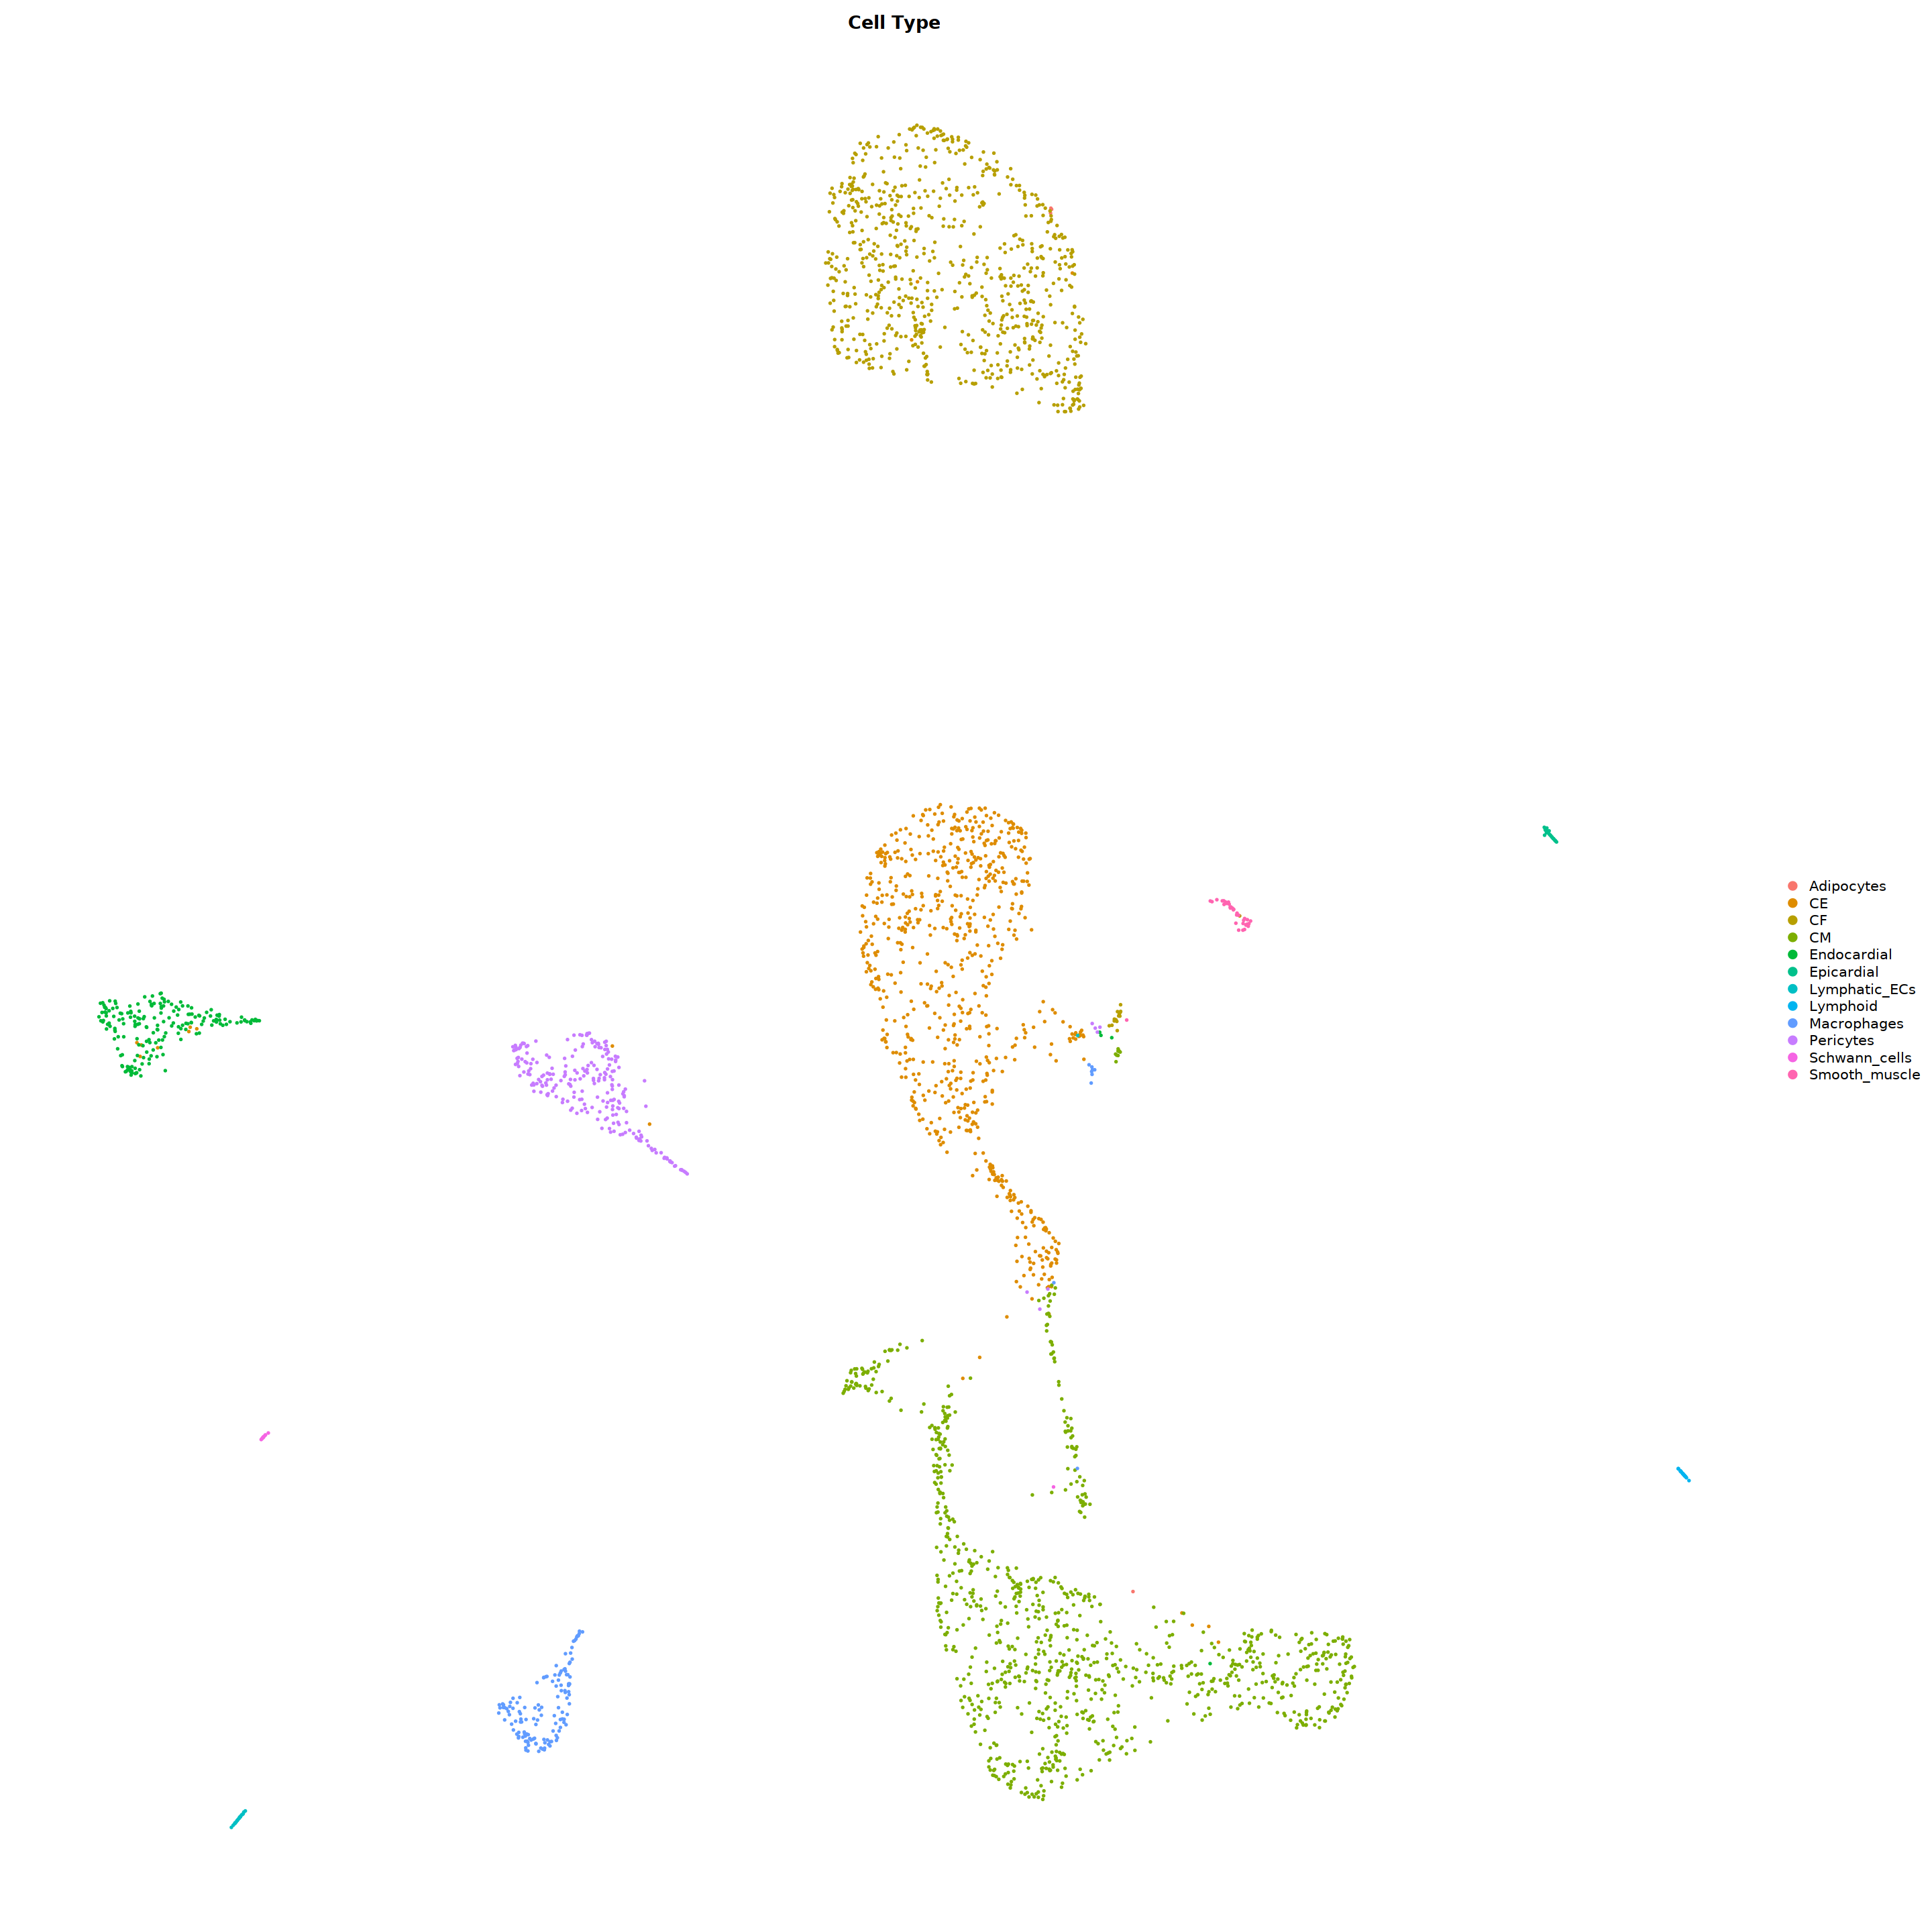

In [194]:
p1 <- DimPlotMetacells(seurat_obj, group.by='celltypes') + umap_theme() + ggtitle("Cell Type")
p1

In [195]:
table(GetMetacellObject(seurat_obj)$celltypes)


   Adipocytes            CE            CF            CM   Endocardial 
            4           775           797          1000           196 
   Epicardial Lymphatic_ECs      Lymphoid   Macrophages     Pericytes 
           27            21            23           145           242 
Schwann_cells Smooth_muscle 
           12            35 

In [196]:
norm.mat <- GetAssayData(metacell_obj, "RNA", slot = "data")[VariableFeatures(seurat_obj), 1:ncol(norm.mat)]

In [197]:
library(PISCES)

In [199]:
work_dir <- "/cellar/users/aklie/data/igvf/topic_grn_links/mouse_heart/preprocess/snrna/"

In [200]:
mat.name <-  file.path(work_dir, 'hdwgcna_metacells_50_1000_celltypes_vargenes_normalized.tsv')

In [201]:
ARACNeTable(data.frame(norm.mat), mat.name)

# Basic Visualization

In [202]:
# rename the modules
seurat_obj <- ResetModuleNames(
  seurat_obj,
  new_name = "HEART-M"
)

[1] "HEART-M1"
[1] "HEART-M2"
[1] "HEART-M3"
[1] "HEART-M4"
[1] "HEART-M5"
[1] "HEART-M6"
[1] "HEART-M7"
[1] "HEART-M8"


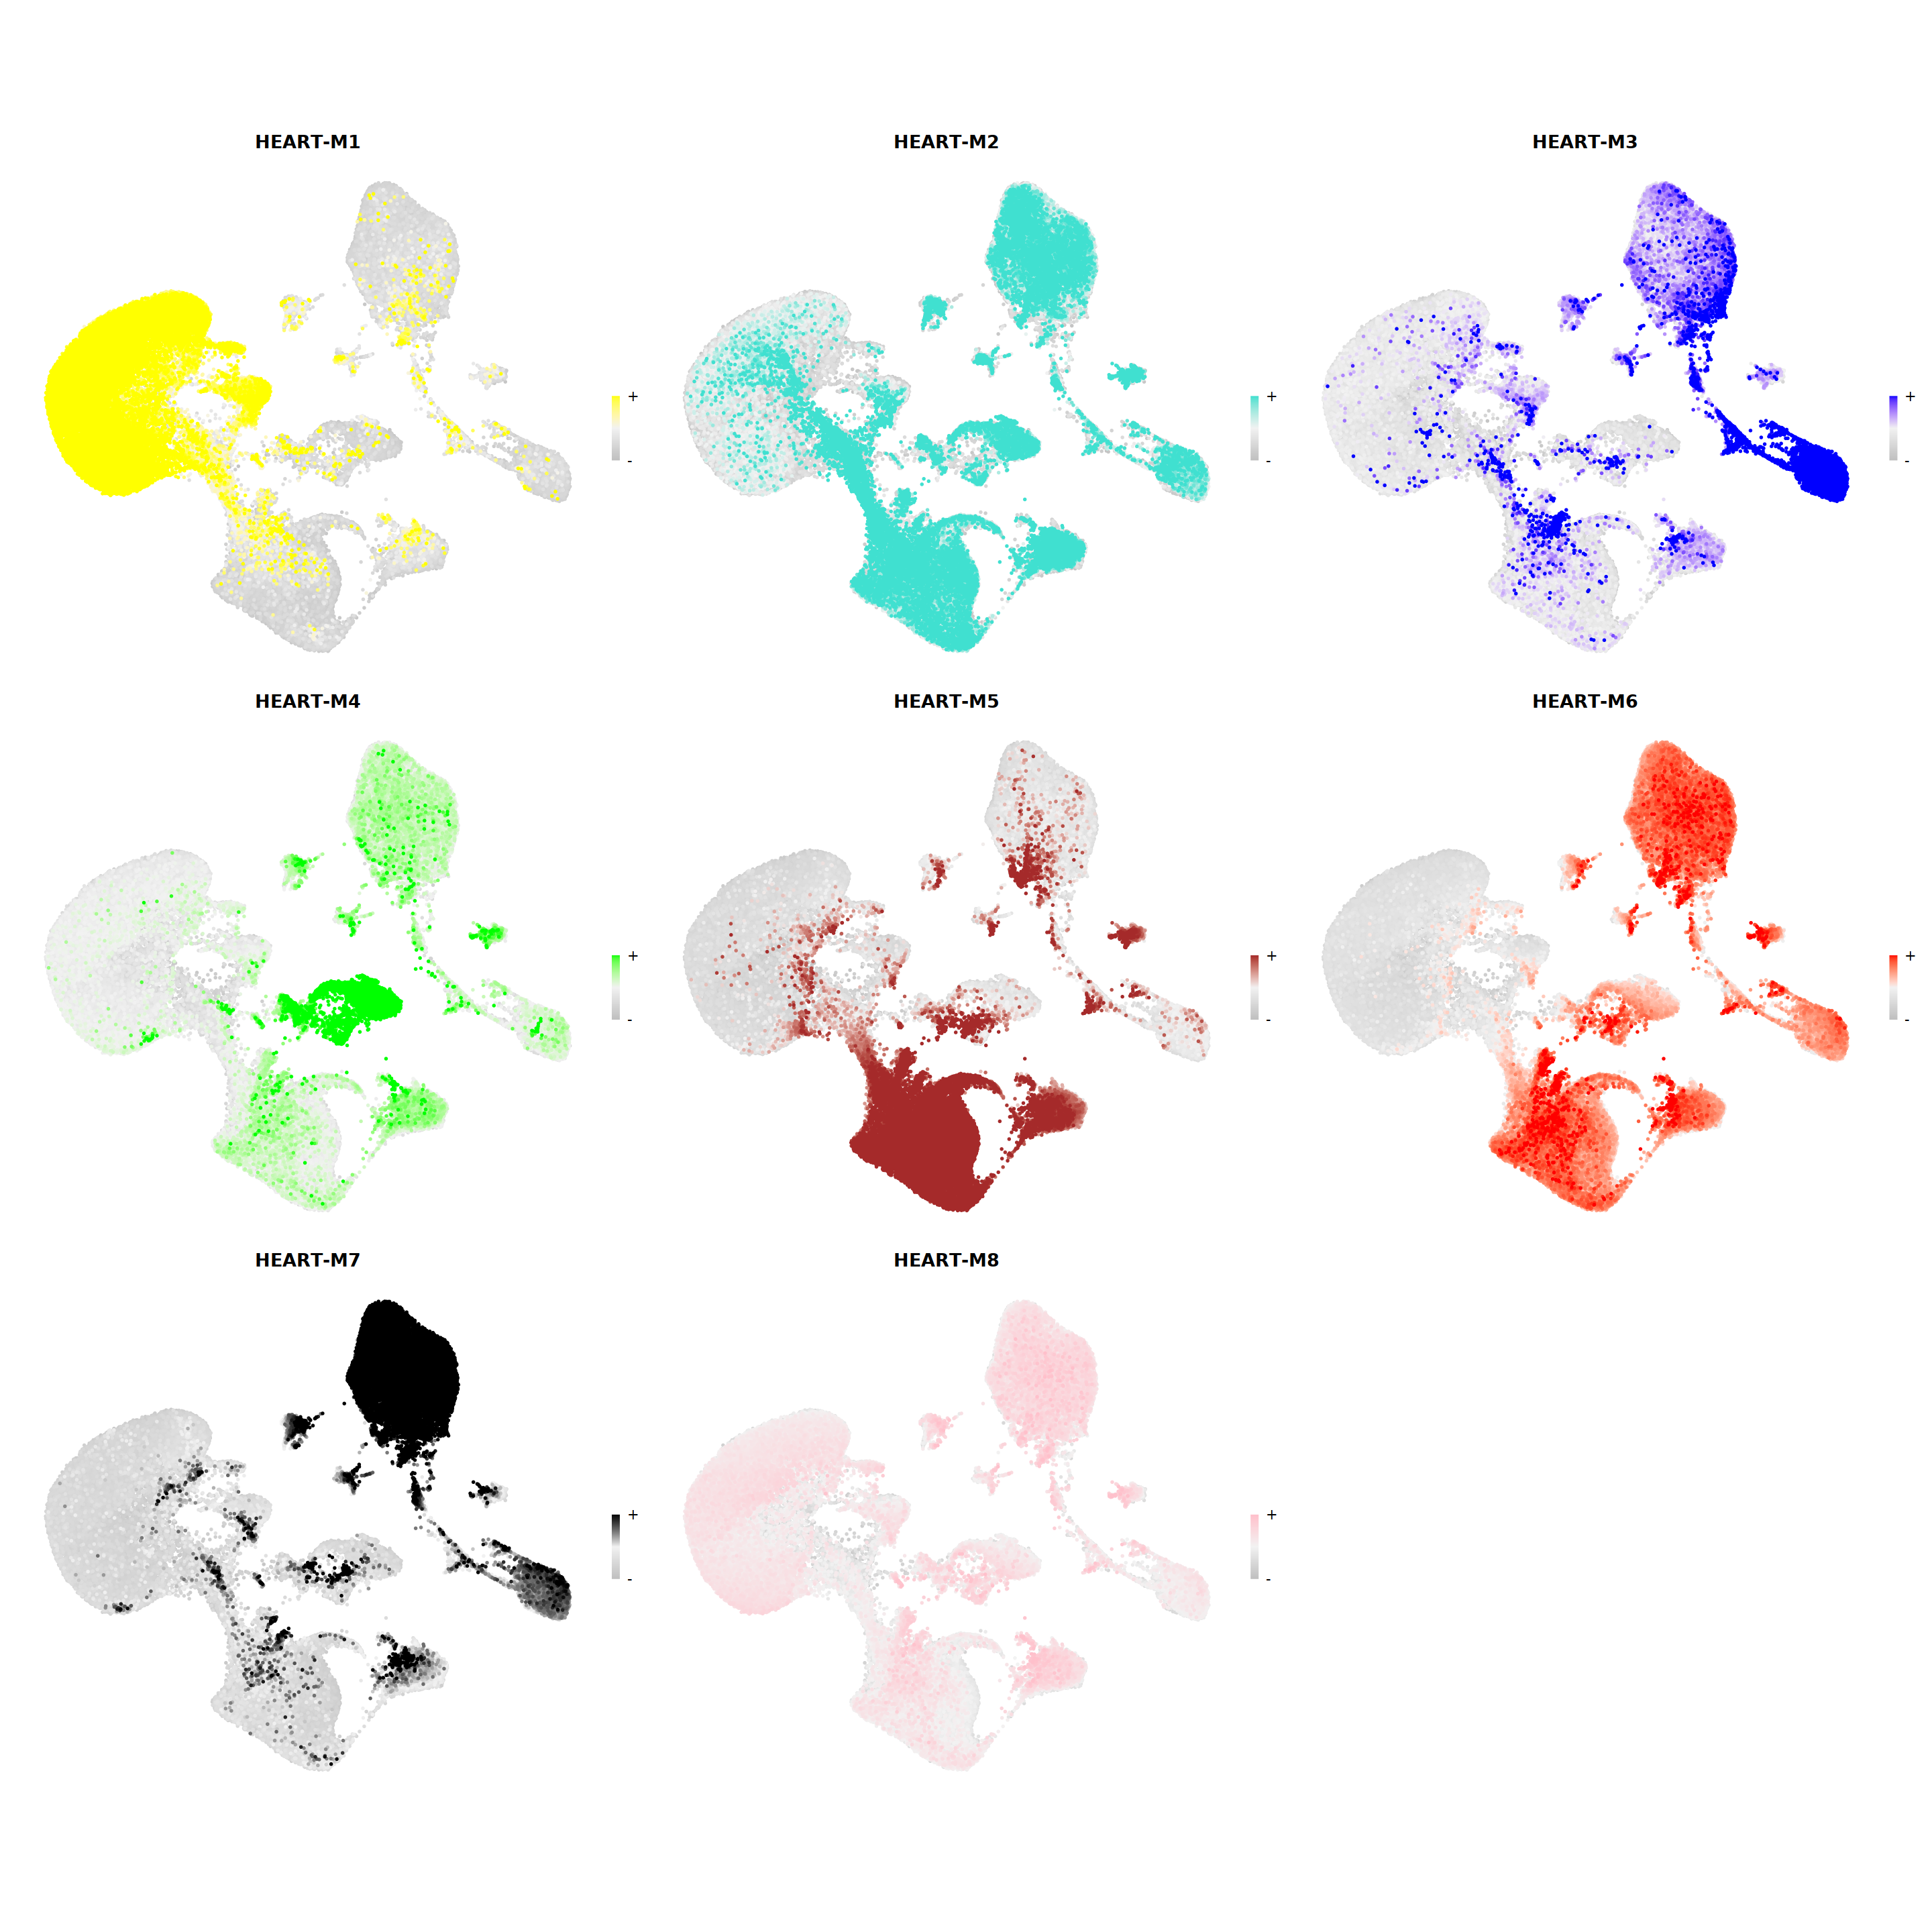

In [203]:
# make a featureplot of hMEs for each module
options(repr.plot.width=24, repr.plot.height=24)
plot_list <- ModuleFeaturePlot(
  seurat_obj,
  reduction="umap",
  features='MEs', # plot the hMEs
  order=TRUE # order so the points with highest hMEs are on top
)

# stitch together with patchwork
wrap_plots(plot_list, ncol=3)

null device 
          1

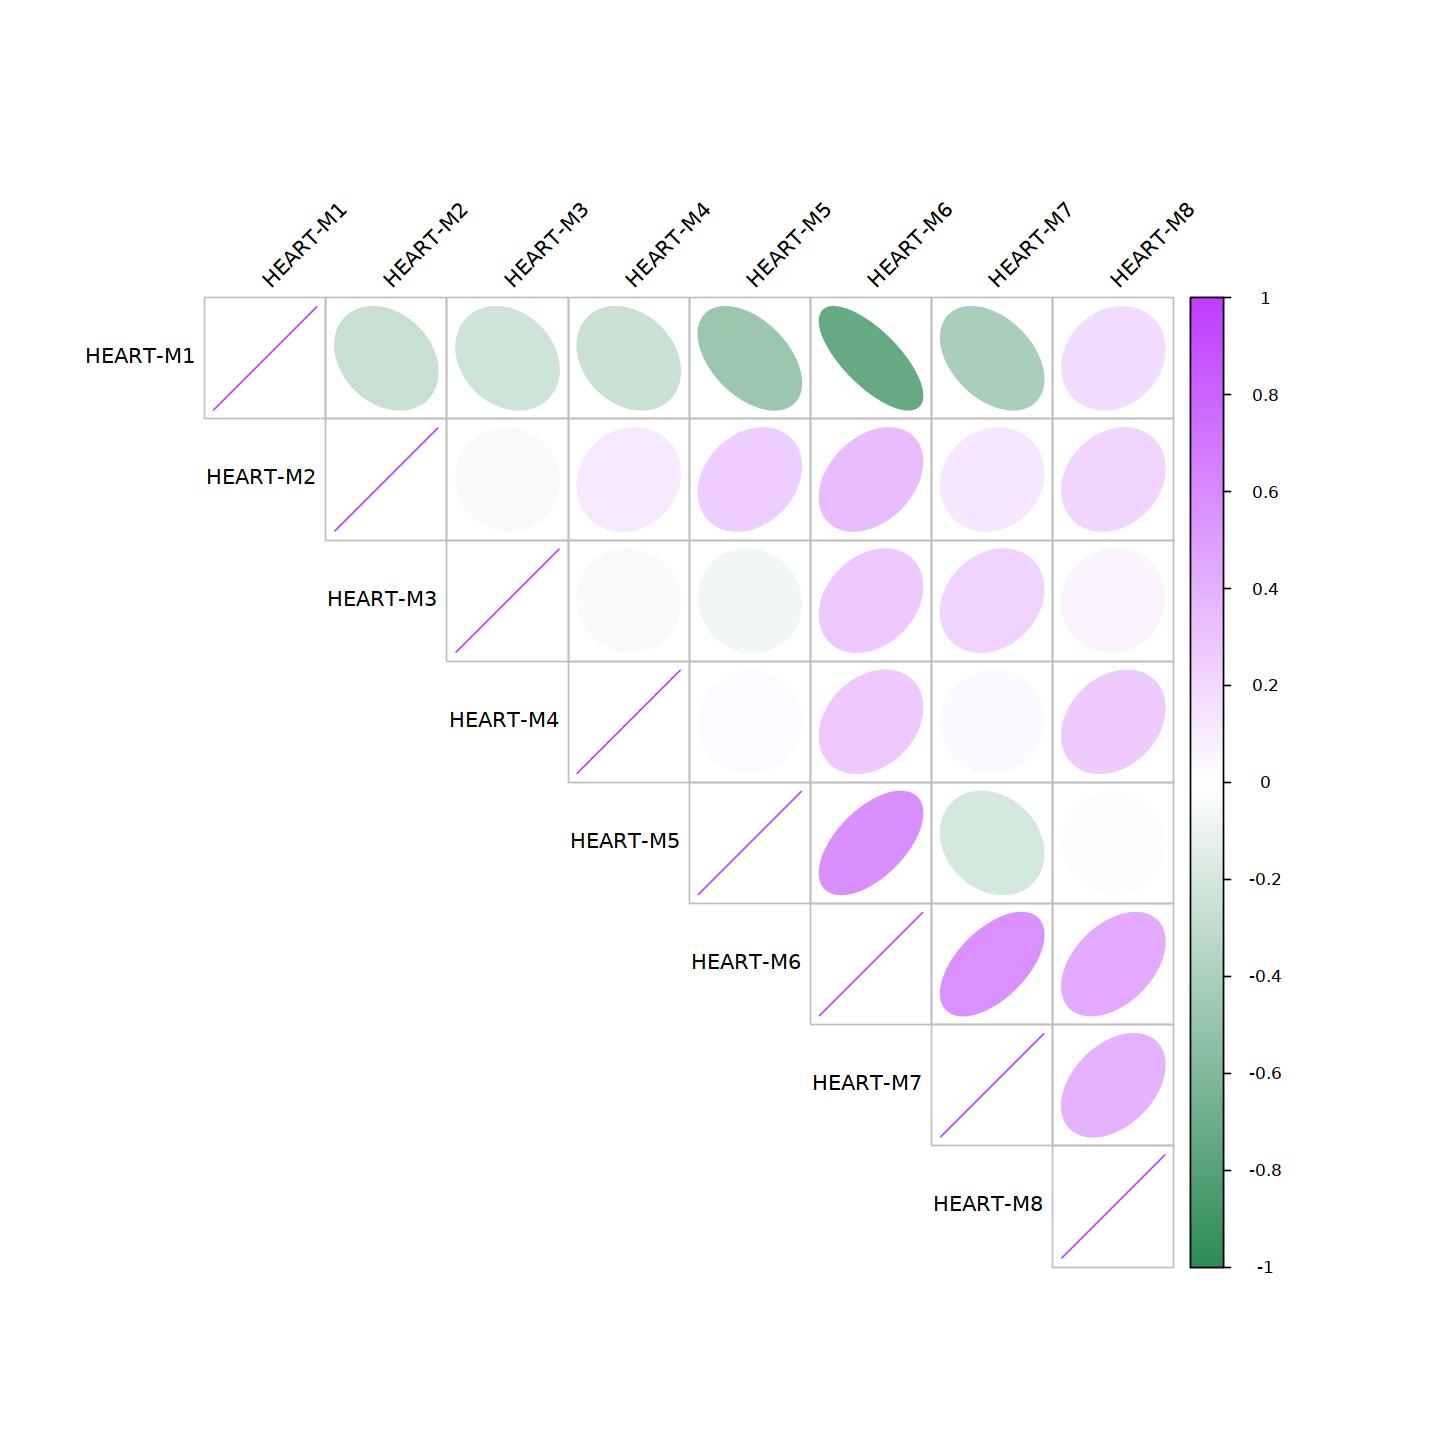

In [204]:
options(repr.plot.width=12, repr.plot.height=12)
ModuleCorrelogram(seurat_obj)
dev.off()

[1] "HEART-M1"
[1] "HEART-M2"
[1] "HEART-M3"
[1] "HEART-M4"
[1] "HEART-M5"
[1] "HEART-M6"
[1] "HEART-M7"
[1] "HEART-M8"
[1] "HEART-M1"
[1] "HEART-M2"
[1] "HEART-M3"
[1] "HEART-M4"
[1] "HEART-M5"
[1] "HEART-M6"
[1] "HEART-M7"
[1] "HEART-M8"


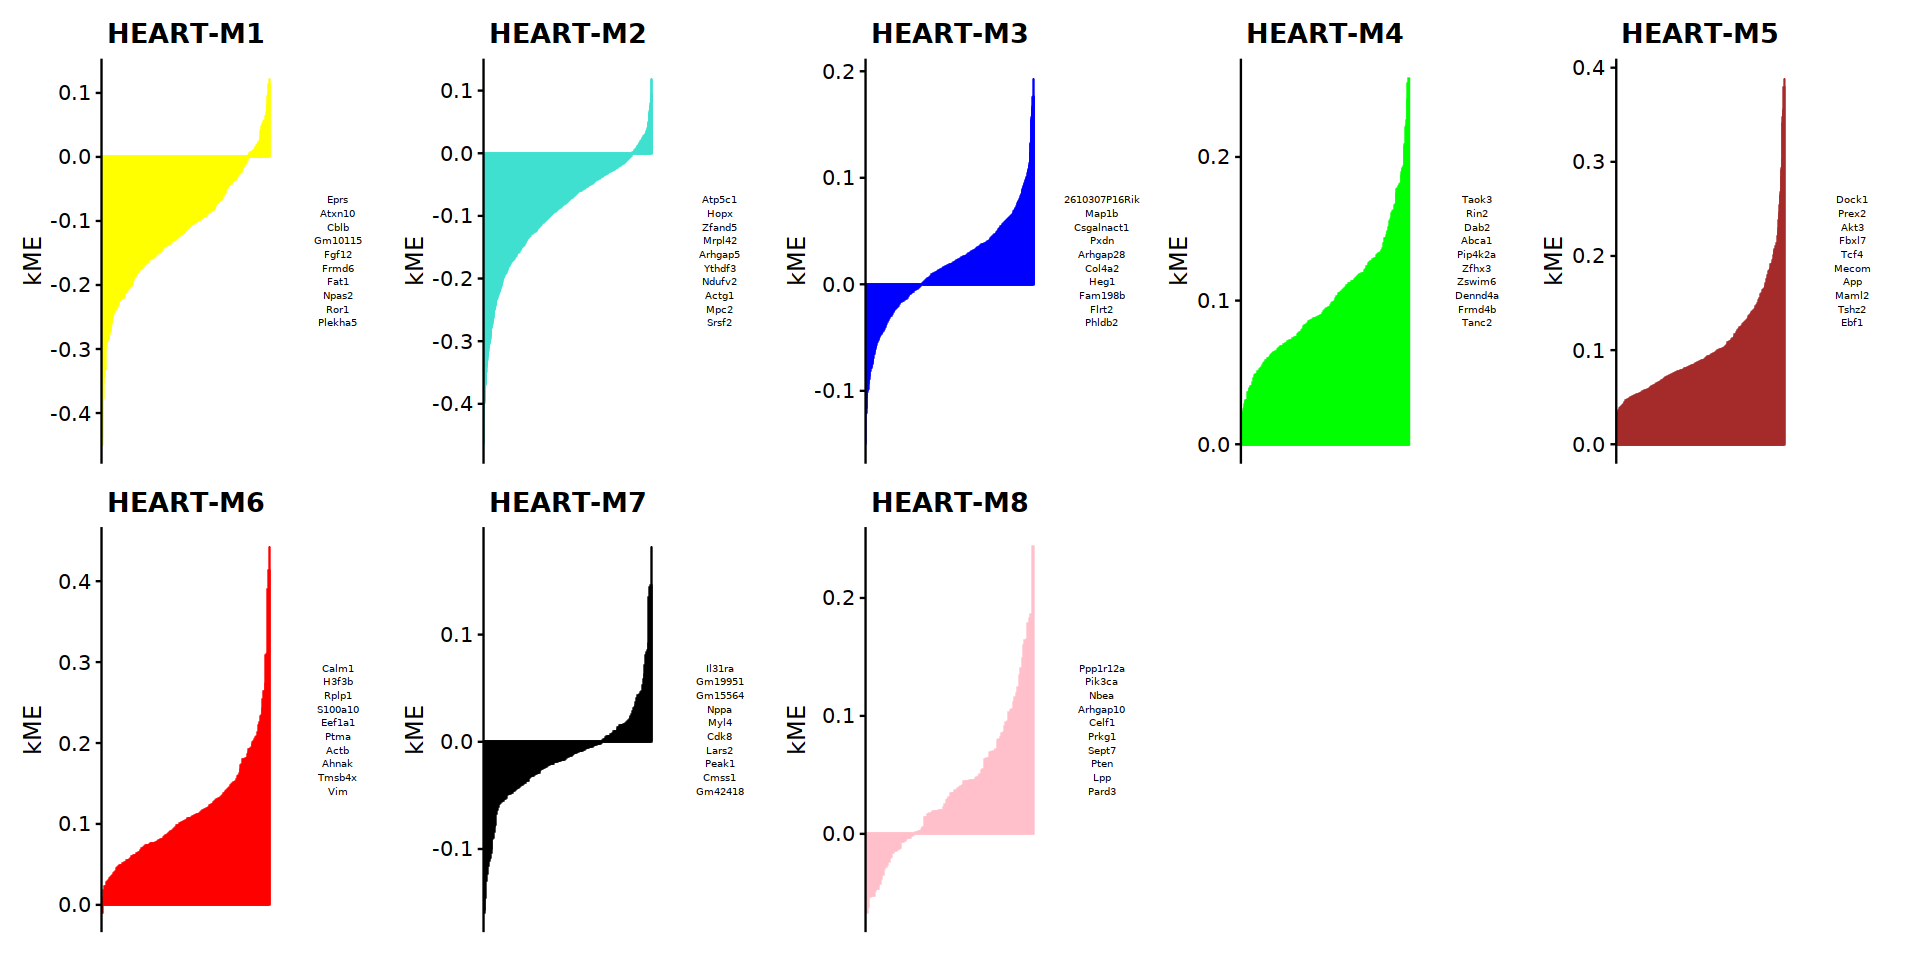

In [205]:
# plot genes ranked by kME for each module
options(repr.plot.height=8, repr.plot.width=16)
p <- PlotKMEs(seurat_obj, ncol=5)
p

In [206]:
hub_df <- GetHubGenes(seurat_obj, n_hubs = 10)
head(hub_df)

gene_name module   kME       
1 Eprs      HEART-M1 0.05872847
2 Atxn10    HEART-M1 0.06363386
3 Cblb      HEART-M1 0.06769477
4 Gm10115   HEART-M1 0.06965576
5 Fgf12     HEART-M1 0.08198070
6 Frmd6     HEART-M1 0.08565698

In [207]:
# compute gene scoring for the top 25 hub genes by kME for each module
# with Seurat method
seurat_obj <- ModuleExprScore(
  seurat_obj,
  n_genes = 25,
  method='Seurat'
)

Selecting by kME_HEART-M1
Selecting by kME_HEART-M2
Selecting by kME_HEART-M3
Selecting by kME_HEART-M4
Selecting by kME_HEART-M5
Selecting by kME_HEART-M6
Selecting by kME_HEART-M7
Selecting by kME_HEART-M8


[1] "HEART-M1"
[1] "HEART-M2"
[1] "HEART-M3"
[1] "HEART-M4"
[1] "HEART-M5"
[1] "HEART-M6"
[1] "HEART-M7"
[1] "HEART-M8"


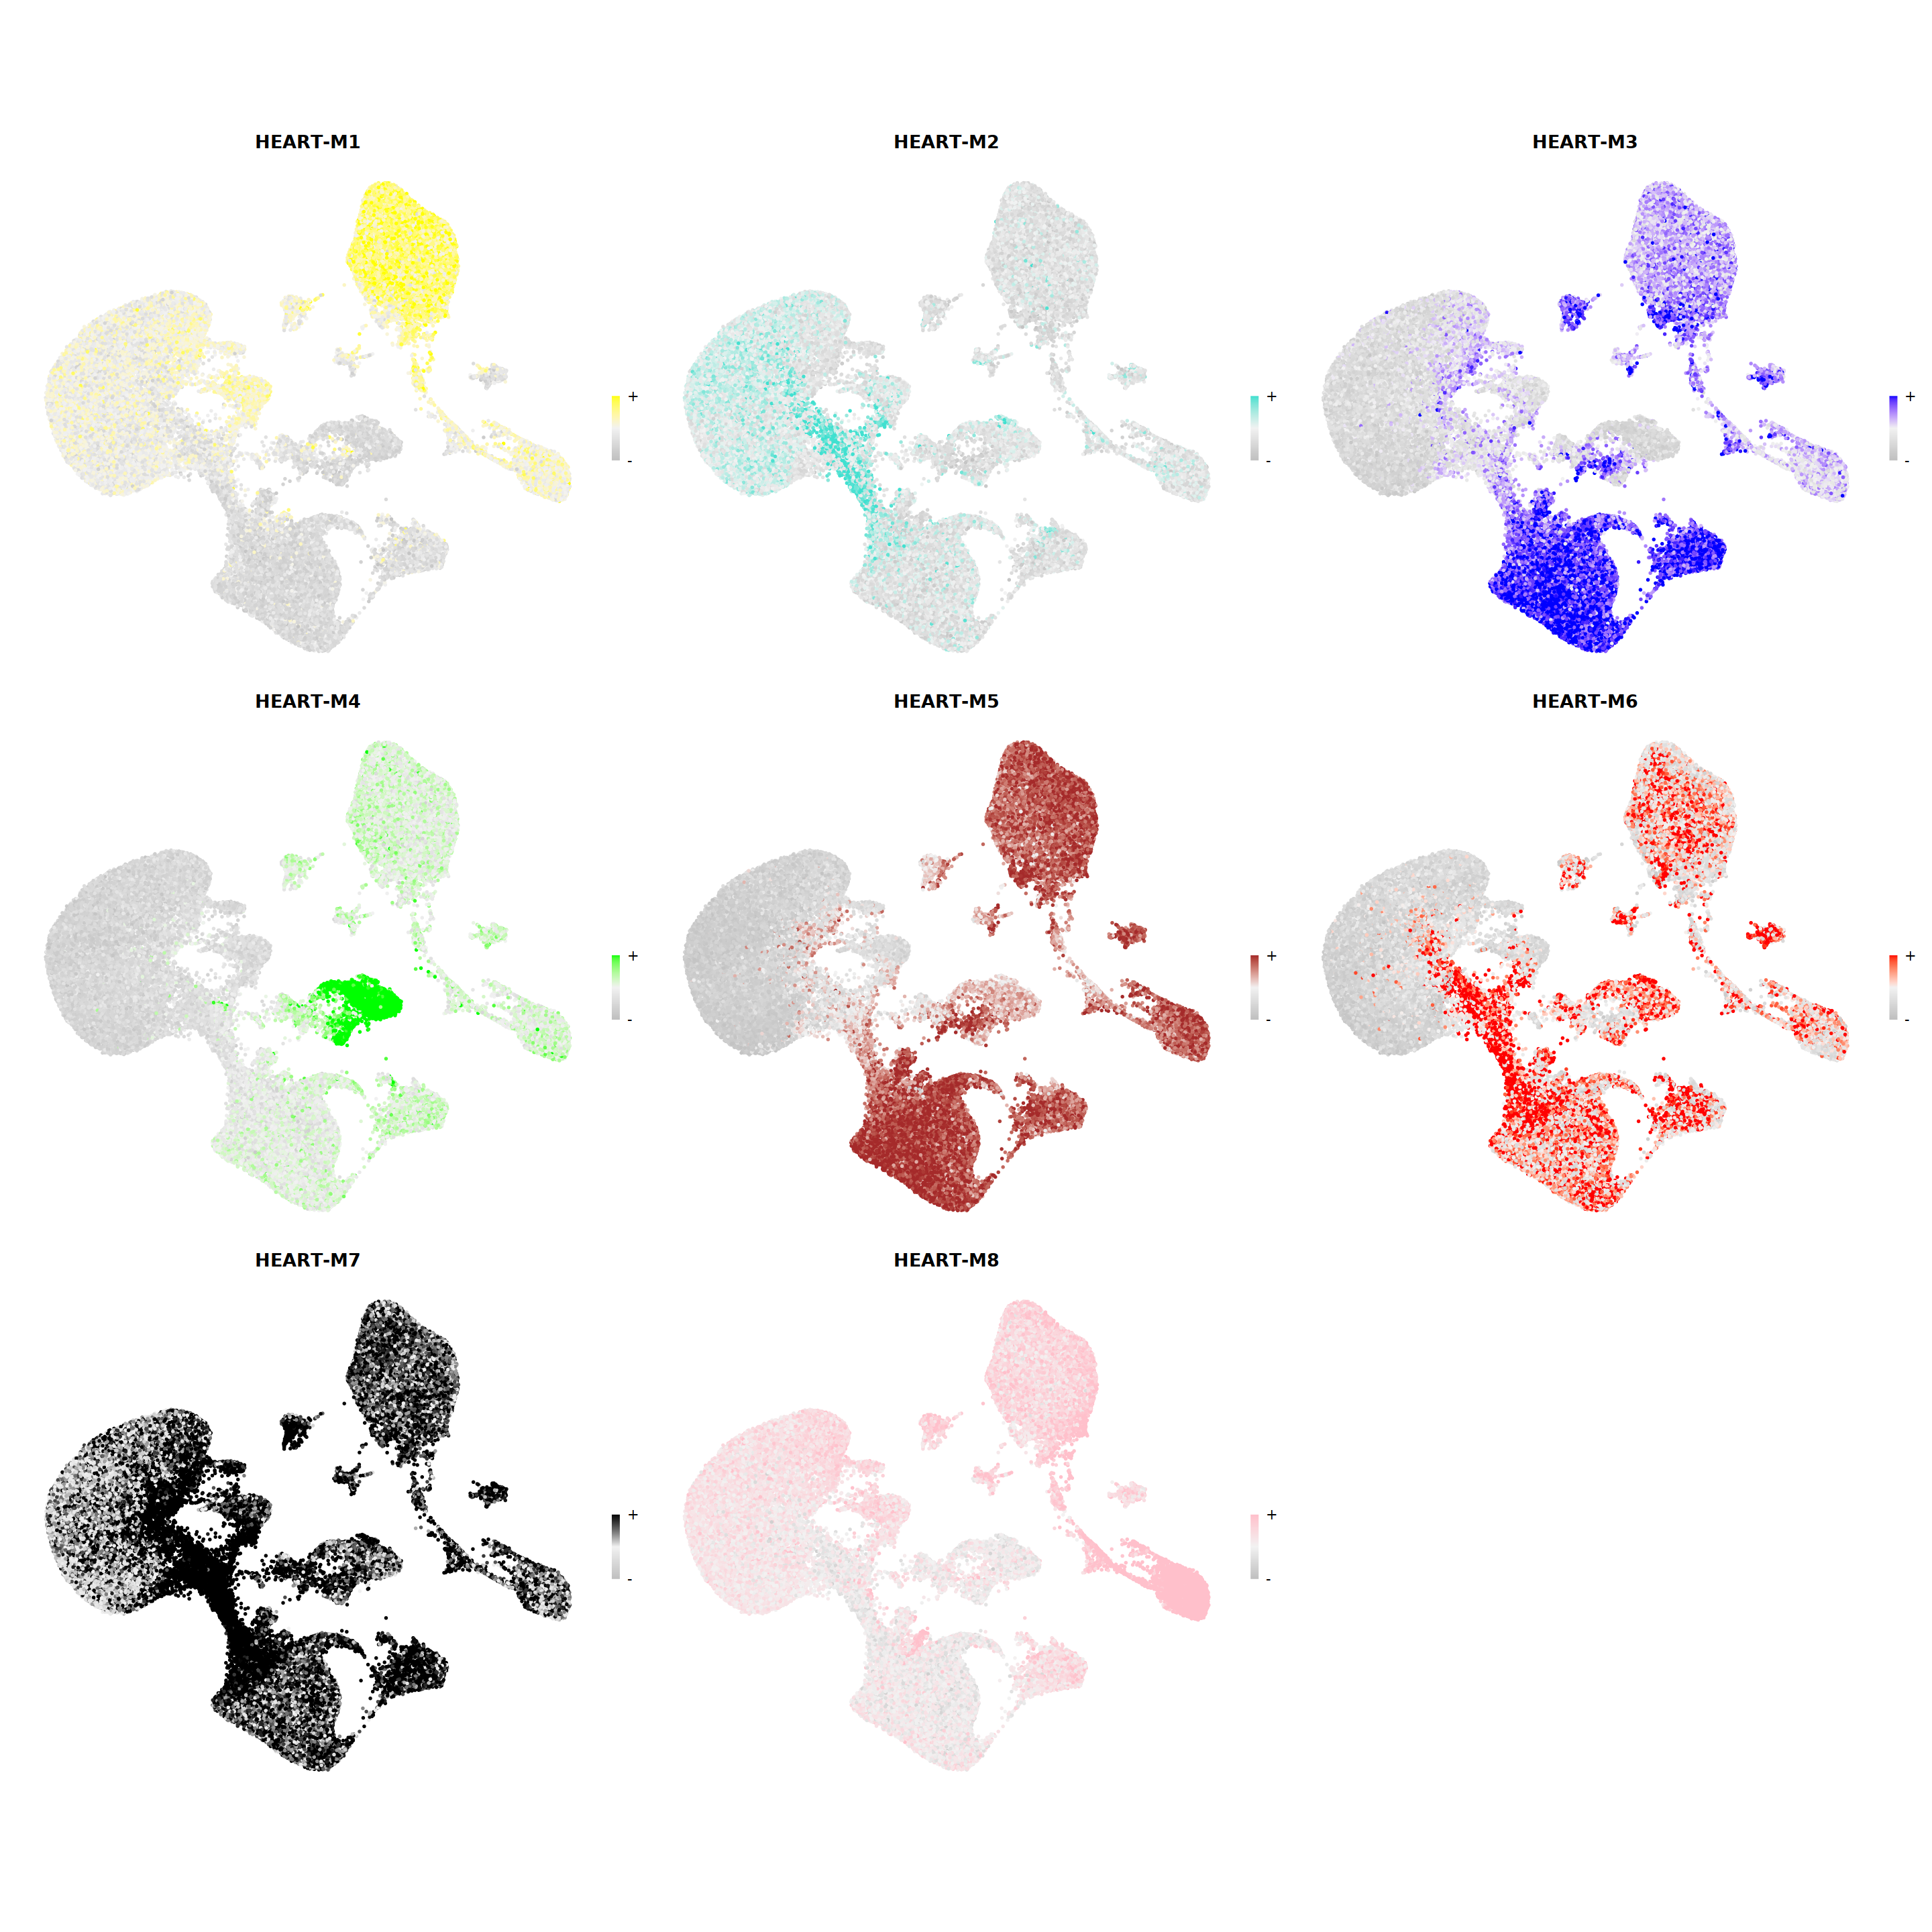

In [208]:
# make a featureplot of hub scores for each module
options(repr.plot.width=24, repr.plot.height=24)
plot_list <- ModuleFeaturePlot(
  seurat_obj,
  features='scores', # plot the hub gene scores
  order='shuffle', # order so cells are shuffled
  ucell = FALSE # depending on Seurat vs UCell for gene scoring
)

# stitch together with patchwork
wrap_plots(plot_list, ncol=3)

In [209]:
# get hMEs from seurat object
MEs <- GetMEs(seurat_obj, harmonized=FALSE)
mods <- colnames(MEs); mods <- mods[mods != 'grey']

In [210]:
# add hMEs to Seurat meta-data:
seurat_obj@meta.data <- cbind(seurat_obj@meta.data, MEs)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



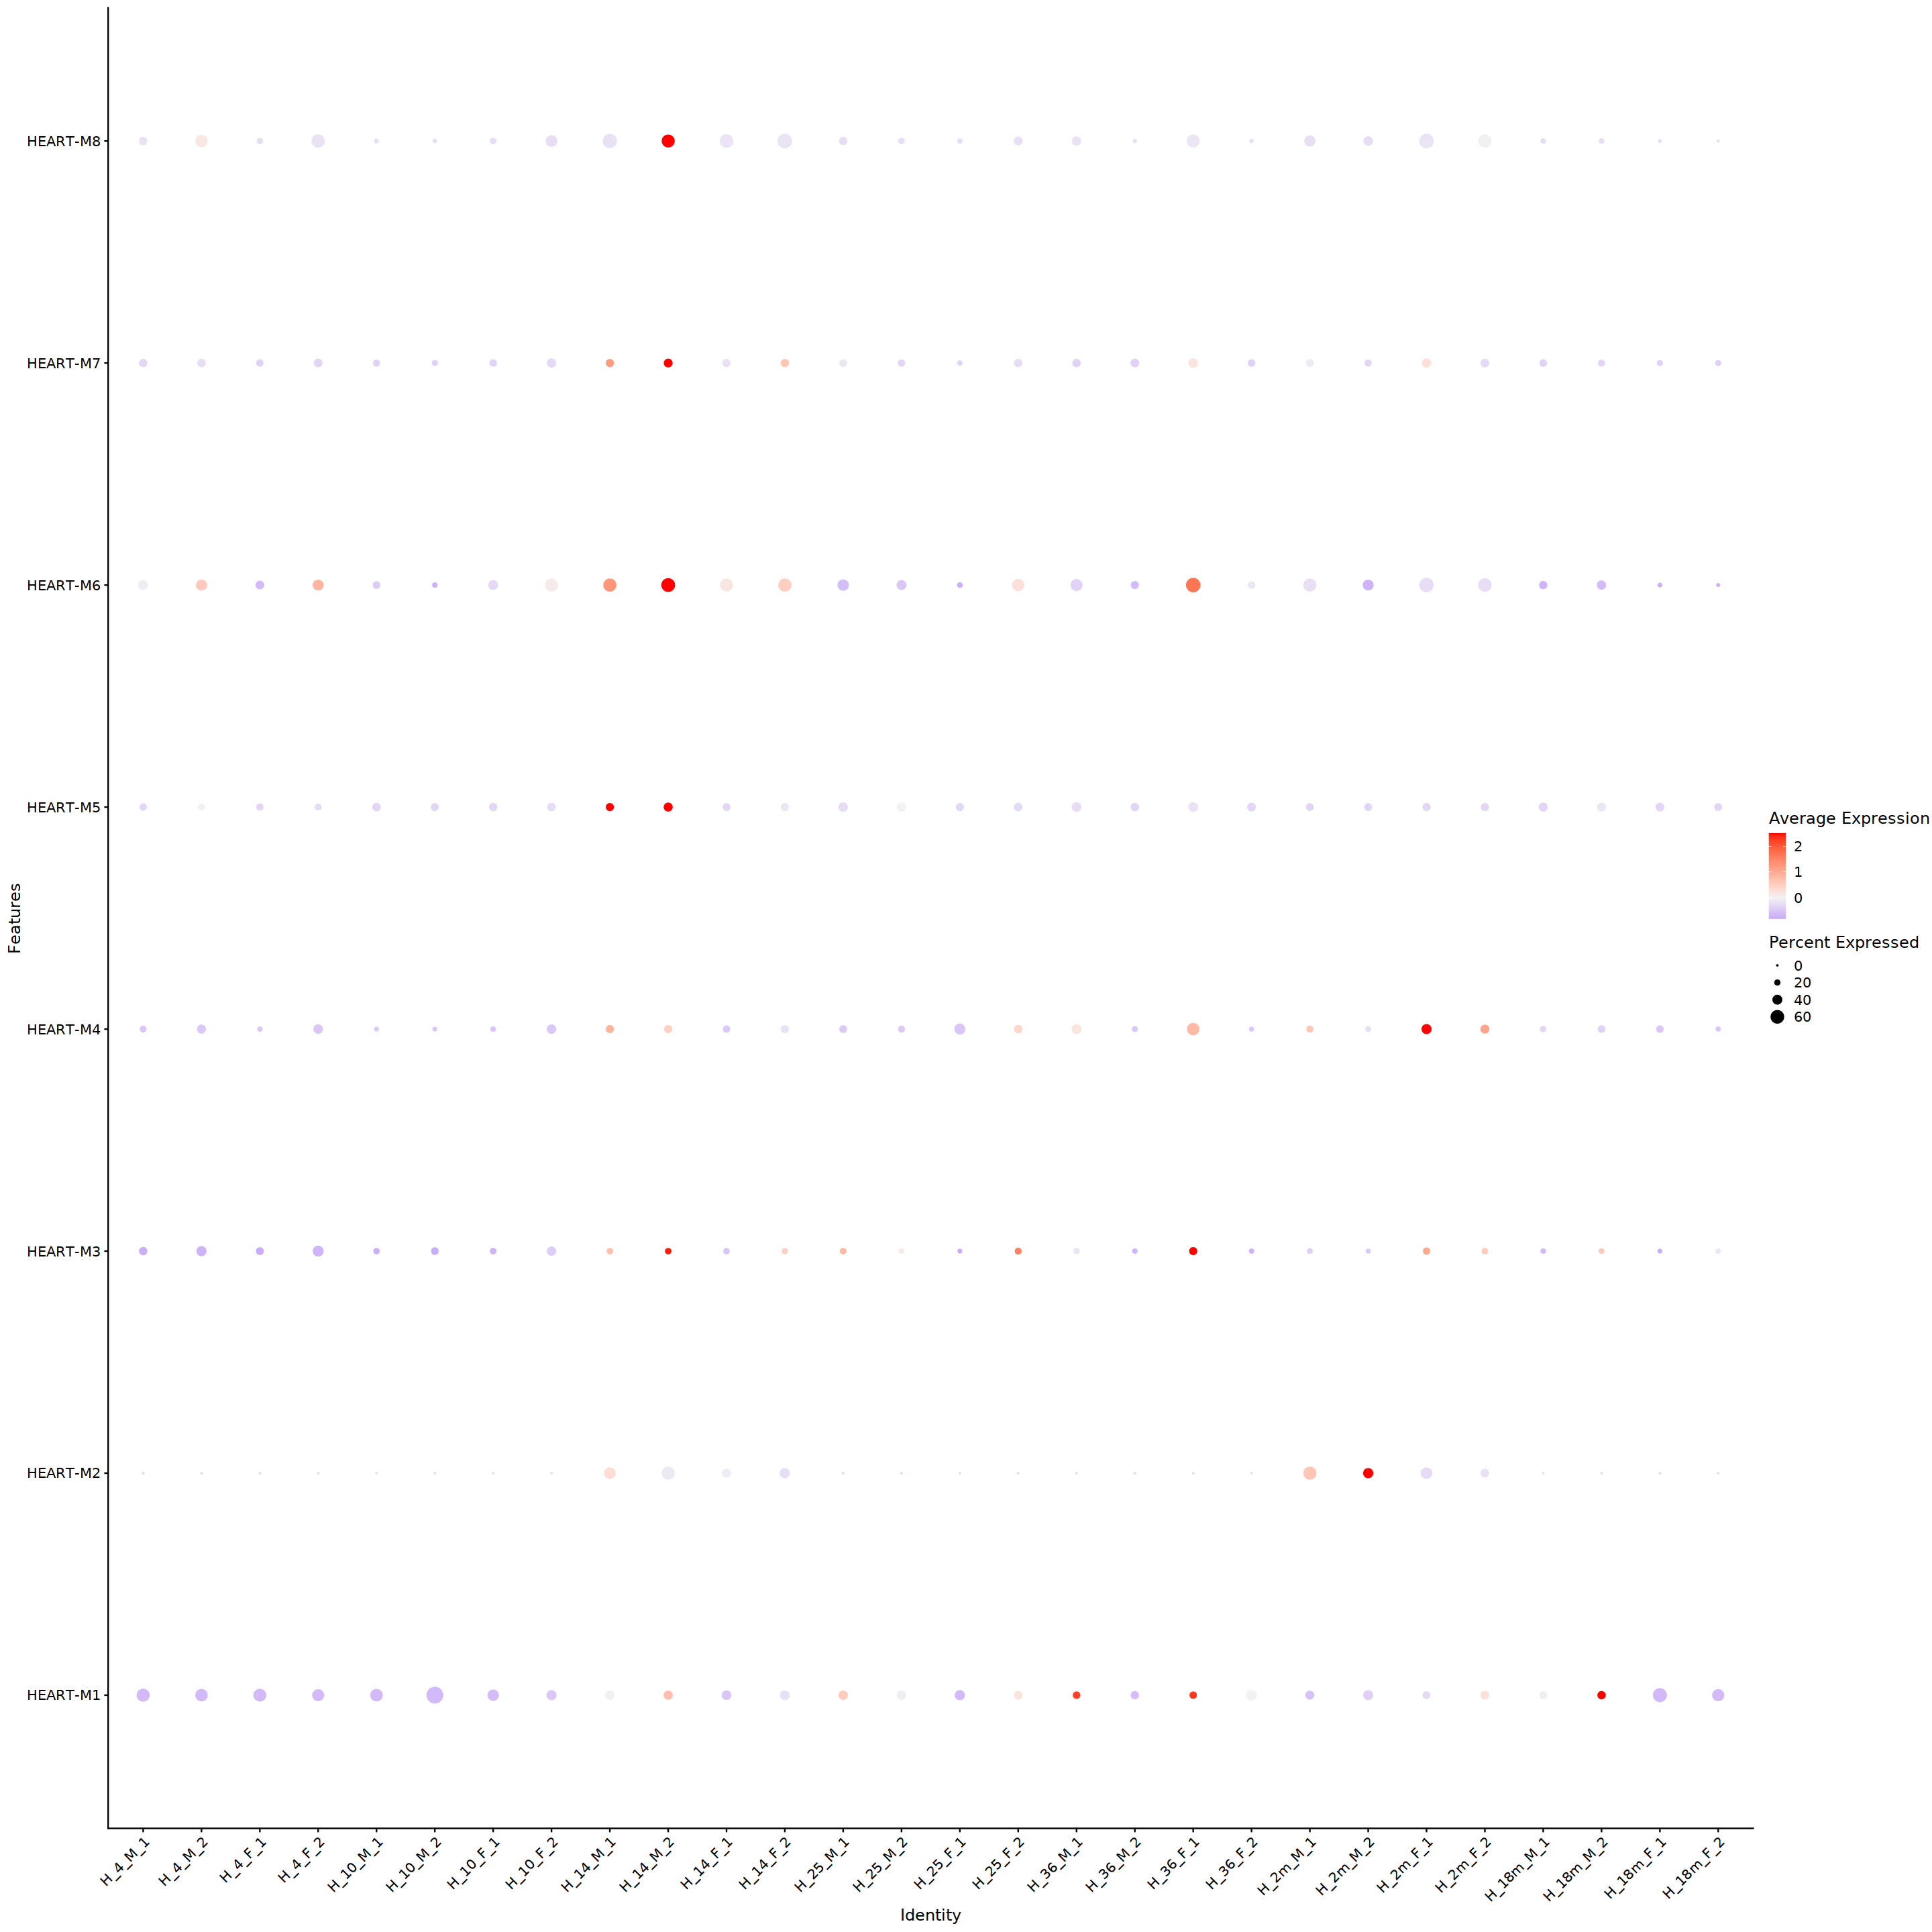

In [215]:
# plot with Seurat's DotPlot function
p <- DotPlot(seurat_obj, features=mods, group.by = 'sample')

# flip the x/y axes, rotate the axis labels, and change color scheme:
p <- p +
  coord_flip() +
  RotatedAxis() +
  scale_color_gradient2(high='red', mid='grey95', low='blue')
p

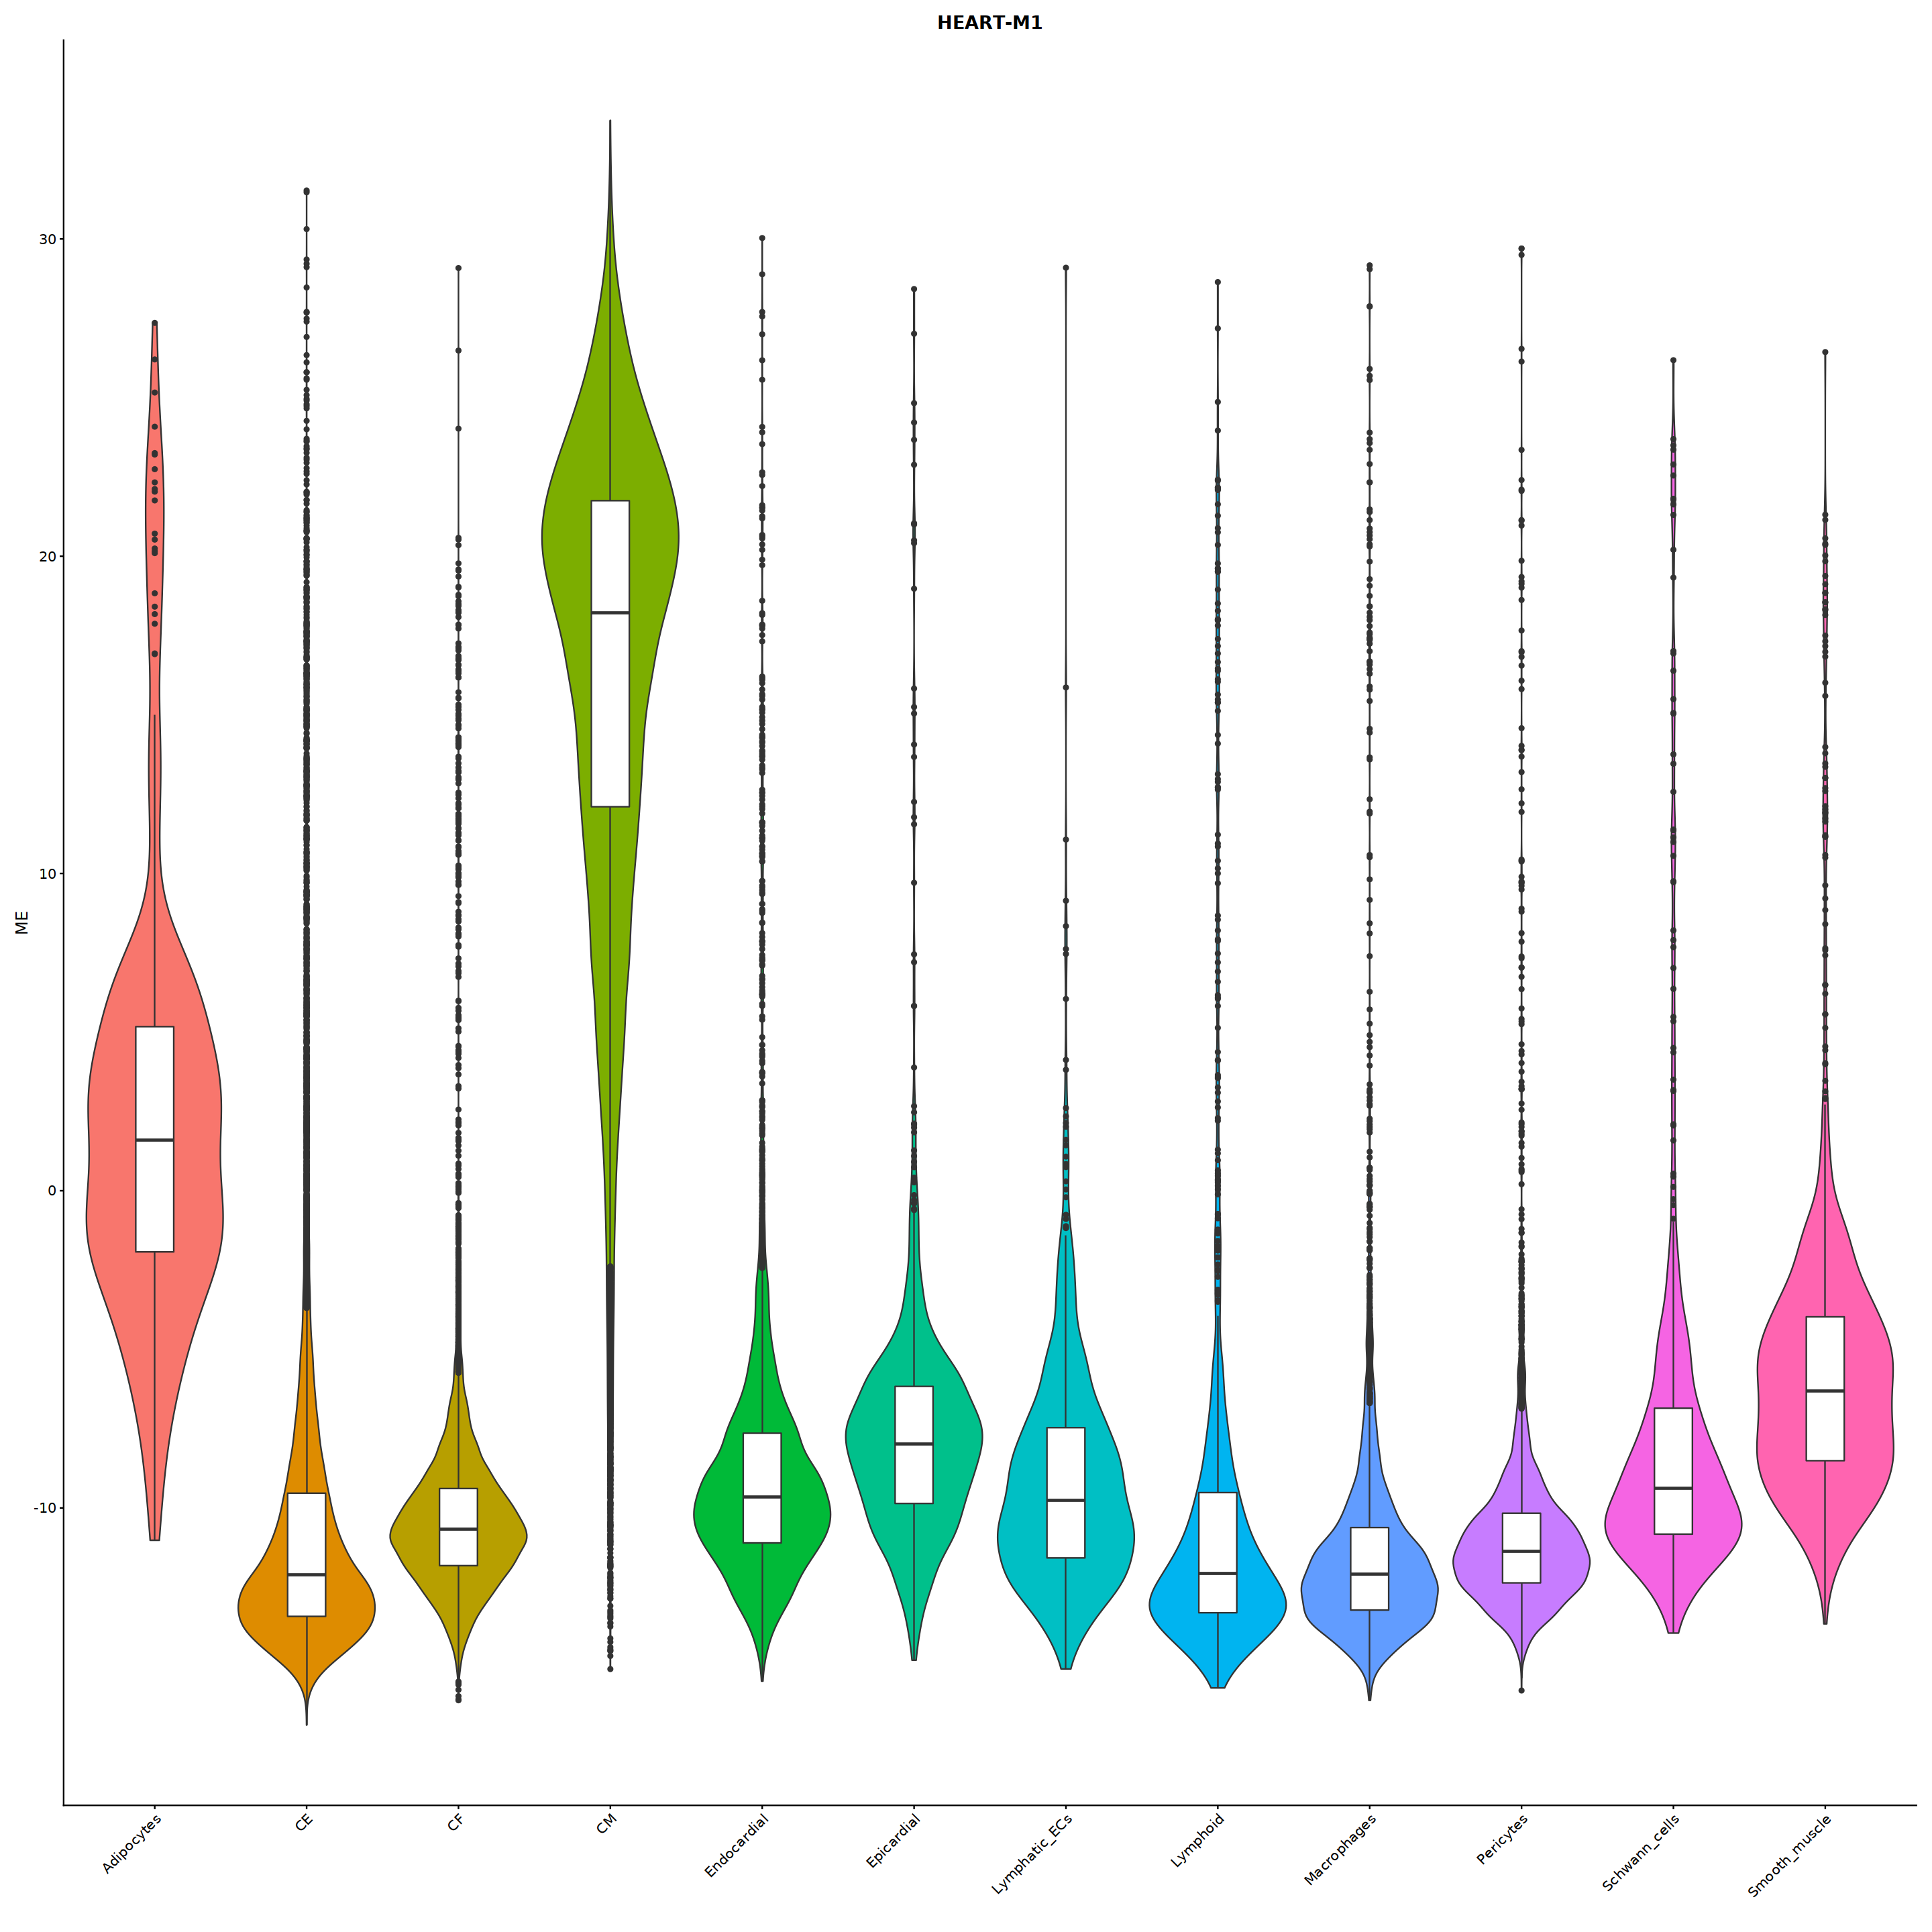

In [212]:
# Plot INH-M4 hME using Seurat VlnPlot function
p <- VlnPlot(
  seurat_obj,
  features = 'HEART-M1',
  group.by = 'celltypes',
  pt.size = 0 # don't show actual data points
)

# add box-and-whisker plots on top:
p <- p + geom_boxplot(width=.25, fill='white')

# change axis labels and remove legend:
p <- p + xlab('') + ylab('ME') + NoLegend()

# plot output
p

# Trait correlations

In [216]:
colnames(seurat_obj[[]])

[1] "orig.ident"                                
 [2] "nCount_RNA"                                
 [3] "nFeature_RNA"                              
 [4] "cellID"                                    
 [5] "doublet_scores"                            
 [6] "doublets"                                  
 [7] "library_accession"                         
 [8] "technology"                                
 [9] "species"                                   
[10] "tissue"                                    
[11] "sex"                                       
[12] "timepoint"                                 
[13] "rep"                                       
[14] "sample"                                    
[15] "depth1"                                    
[16] "depth2"                                    
[17] "experiment"                                
[18] "experiment_batch"                          
[19] "integration_batch"                         
[20] "run_number"                                
[21] "experiment_accession"                      
[22] "file_accession"                            
[23] "lower_nCount_RNA"                          
[24] "upper_nCount_RNA"                          
[25] "lower_nFeature_RNA"                        
[26] "upper_doublet_scores"                      
[27] "upper_percent.mt"                          
[28] "percent.mt"                                
[29] "percent.ribo"                              
[30] "nCount_SCT"                                
[31] "nFeature_SCT"                              
[32] "integrated_snn_res.1.6"                    
[33] "seurat_clusters"                           
[34] "predicted.id"                              
[35] "prediction.score.Macrophages"              
[36] "prediction.score.Fibroblasts"              
[37] "prediction.score.Endothelial"              
[38] "prediction.score.Endocardial"              
[39] "prediction.score.Schwann_cells"            
[40] "prediction.score.Fibroblasts_Wif1."        
[41] "prediction.score.Smooth_muscle"            
[42] "prediction.score.B_cells"                  
[43] "prediction.score.Lymphatic_ECs"            
[44] "prediction.score.DC.like_cells"            
[45] "prediction.score.T_cells"                  
[46] "prediction.score.Granulocytes"             
[47] "prediction.score.Cardiomyocytes"           
[48] "prediction.score.Epicardial"               
[49] "prediction.score.max"                      
[50] "predictions"                               
[51] "S.Score"                                   
[52] "G2M.Score"                                 
[53] "Phase"                                     
[54] "prediction.score.Smooth_muscle_cells"      
[55] "prediction.score.Ventricular_Cardiomyocyte"
[56] "prediction.score.Pericytes"                
[57] "prediction.score.NotAssigned"              
[58] "prediction.score.Fibroblast"               
[59] "prediction.score.Adipocytes"               
[60] "prediction.score.Lymphoid"                 
[61] "prediction.score.doublets"                 
[62] "prediction.score.Myeloid"                  
[63] "prediction.score.Neuronal"                 
[64] "prediction.score.Atrial_Cardiomyocyte"     
[65] "prediction.score.Mesothelial"              
[66] "atlas_predictions"                         
[67] "integrated_snn_res.2"                      
[68] "atlas_celltypes"                           
[69] "stressed_celltypes"                        
[70] "subtypes"                                  
[71] "celltypes"                                 
[72] "gen_celltype"                              
[73] "metacell_grouping"                         
[74] "HEART-M1"                                  
[75] "HEART-M2"                                  
[76] "grey"                                      
[77] "HEART-M3"                                  
[78] "HEART-M4"                                  
[79] "HEART-M5"                                  
[80] "HEART-M6"                                  
[

In [218]:
table(seurat_obj$timepoint)


   PND_04    PND_10    PND_14    PND_25    PND_36    PNM_02 PNM_18-20 
     7473      5411     46423      5116      2274     24168      2657 

In [219]:
x <- str_split(seurat_obj$timepoint, "_")
x <- sapply(x, "[", 2)
x <- str_split(x, "-")
x <- sapply(x, "[", 1)
x <- as.integer(x)
seurat_obj$timepoint_int <- x

In [220]:
table(seurat_obj$timepoint_int)


    2     4    10    14    18    25    36 
24168  7473  5411 46423  2657  5116  2274 

In [221]:
seurat_obj$sex <- as.factor(seurat_obj$sex)
table(seurat_obj$sex)


Female   Male 
 47679  45843 

In [222]:
seurat_obj$depth1 <- as.factor(seurat_obj$depth1)
table(seurat_obj$depth1)


   deep shallow 
   2047   91475 

In [223]:
cur_traits <- c('sex', 'depth1', 'timepoint_int', 'doublet_scores', 'nCount_RNA', 'nFeature_RNA', 'percent.mt')

In [224]:
seurat_obj <- ModuleTraitCorrelation(
  seurat_obj,
  traits = cur_traits,
  group.by='celltypes'
)

Warning message in ModuleTraitCorrelation(seurat_obj, traits = cur_traits, group.by = "celltypes"):
“Trait sex is a factor with levels Female, Male. Levels will be converted to numeric IN THIS ORDER for the correlation, is this the expected order?”
Warning message in ModuleTraitCorrelation(seurat_obj, traits = cur_traits, group.by = "celltypes"):
“Trait depth1 is a factor with levels deep, shallow. Levels will be converted to numeric IN THIS ORDER for the correlation, is this the expected order?”


In [225]:
mt_cor <- GetModuleTraitCorrelation(seurat_obj)
names(mt_cor)

[1] "cor"  "pval" "fdr"

[1] "all_cells"
[1] "sex"            "depth1"         "timepoint_int"  "doublet_scores"
[5] "nCount_RNA"     "nFeature_RNA"   "percent.mt"    
[1] "Adipocytes"
[1] "sex"            "depth1"         "timepoint_int"  "doublet_scores"
[5] "nCount_RNA"     "nFeature_RNA"   "percent.mt"    
[1] "CE"
[1] "sex"            "depth1"         "timepoint_int"  "doublet_scores"
[5] "nCount_RNA"     "nFeature_RNA"   "percent.mt"    
[1] "CF"
[1] "sex"            "depth1"         "timepoint_int"  "doublet_scores"
[5] "nCount_RNA"     "nFeature_RNA"   "percent.mt"    
[1] "CM"
[1] "sex"            "depth1"         "timepoint_int"  "doublet_scores"
[5] "nCount_RNA"     "nFeature_RNA"   "percent.mt"    
[1] "Endocardial"
[1] "sex"            "depth1"         "timepoint_int"  "doublet_scores"
[5] "nCount_RNA"     "nFeature_RNA"   "percent.mt"    
[1] "Epicardial"
[1] "sex"            "depth1"         "timepoint_int"  "doublet_scores"
[5] "nCount_RNA"     "nFeature_RNA"   "percent.mt"    
[1] "Lymphatic_E

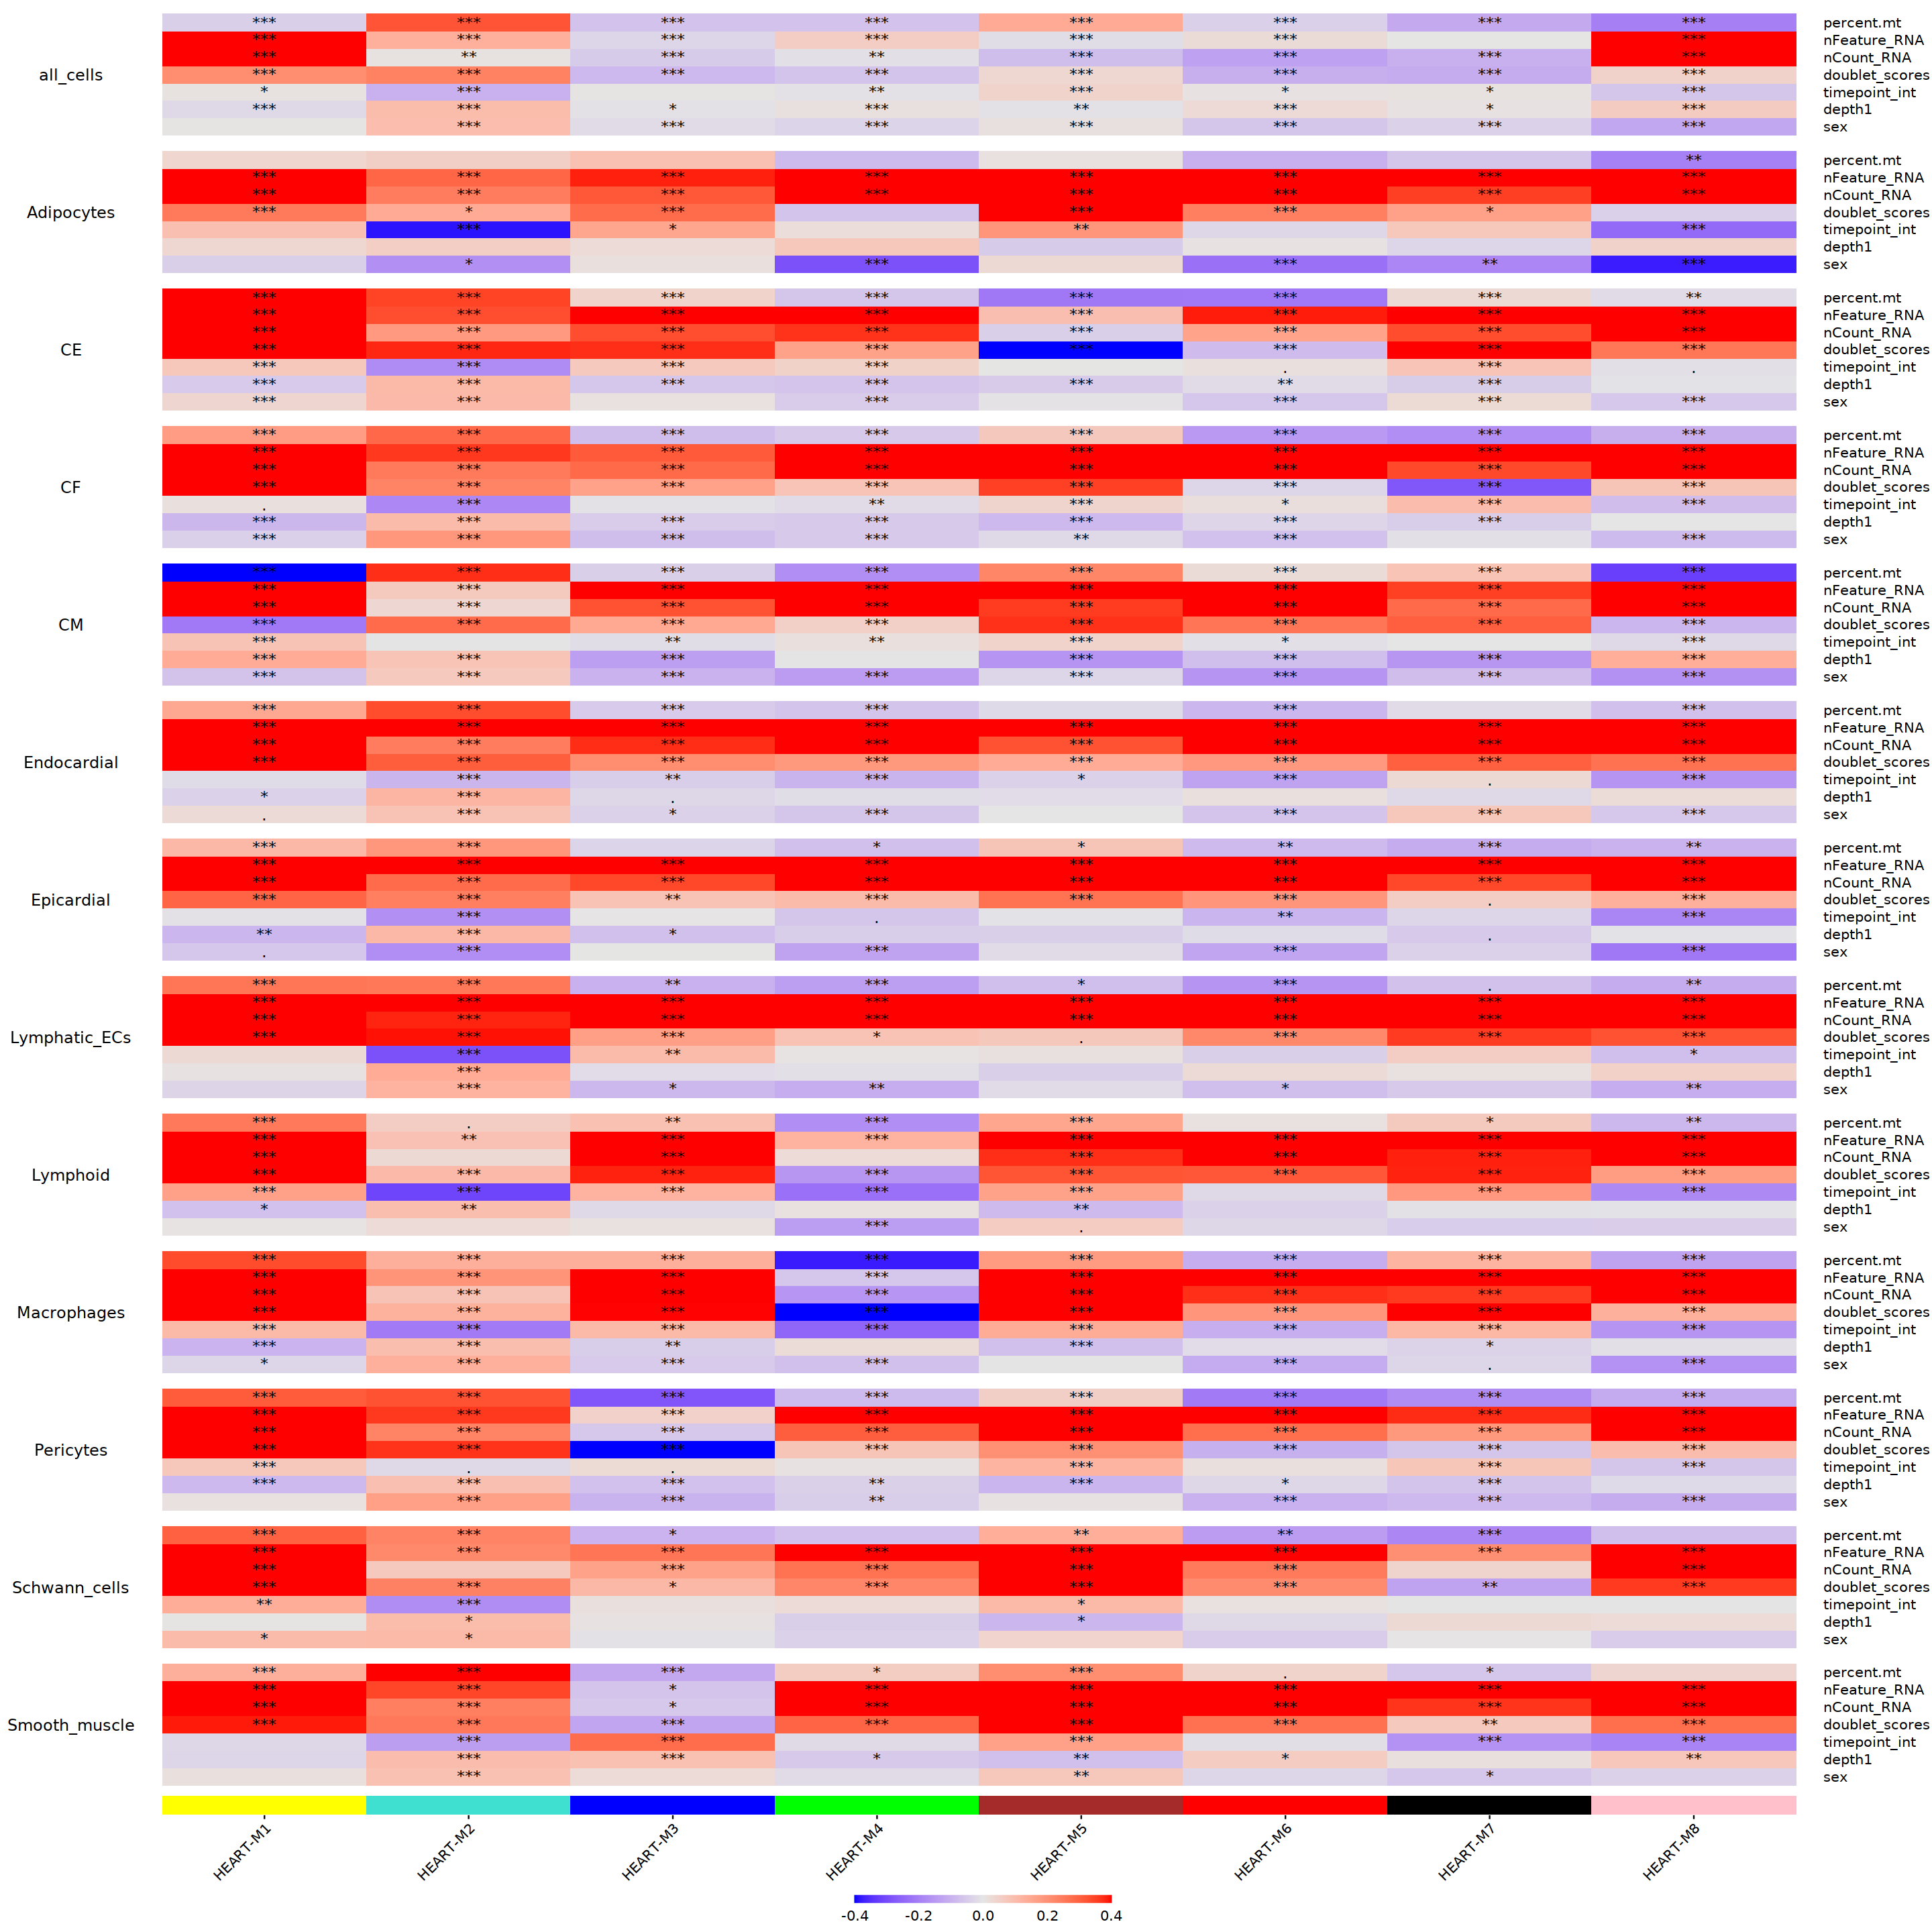

In [226]:
PlotModuleTraitCorrelation(
  seurat_obj,
  label = 'fdr',
  label_symbol = 'stars',
  text_size = 5,
  text_digits = 3,
  combine=TRUE,
  plot_max = 0.4
)

In [105]:
seurat_obj@meta.data <- cbind(seurat_obj@meta.data, 
                              binarizeCategoricalColumns.forPlots(seurat_obj$celltypes))
colnames(seurat_obj@meta.data)

[1] "orig.ident"                     "nCount_RNA"                    
 [3] "nFeature_RNA"                   "cellID"                        
 [5] "doublet_scores"                 "doublets"                      
 [7] "library_accession"              "technology"                    
 [9] "species"                        "tissue"                        
[11] "sex"                            "timepoint"                     
[13] "rep"                            "sample"                        
[15] "depth1"                         "depth2"                        
[17] "experiment"                     "experiment_batch"              
[19] "integration_batch"              "run_number"                    
[21] "experiment_accession"           "file_accession"                
[23] "lower_nCount_RNA"               "upper_nCount_RNA"              
[25] "lower_nFeature_RNA"             "upper_doublet_scores"          
[27] "upper_percent.mt"               "percent.mt"                    
[29] "percent.ribo"                   "nCount_SCT"                    
[31] "nFeature_SCT"                   "integrated_snn_res.1.6"        
[33] "seurat_clusters"                "S.Score"                       
[35] "G2M.Score"                      "Phase"                         
[37] "subtypes"                       "celltypes"                     
[39] "gen_celltype"                   "Cortex_membership_score"       
[41] "Endothelial_membership_score"   "Adipocytes_membership_score"   
[43] "Myeloid_membership_score"       "Sox10._membership_score"       
[45] "Fibroblast_membership_score"    "Medulla_membership_score"      
[47] "Stromal_membership_score"       "Smooth_muscle_membership_score"
[49] "Capsule_membership_score"       "Hepatocyte_membership_score"   
[51] "Myonuclei_membership_score"     "gen_celltype_membership_score" 
[53] "metacell_grouping"              "ADRENAL-M1"                    
[55] "ADRENAL-M2"                     "grey"                          
[57] "ADRENAL-M3"                     "ADRENAL-M4"                    
[59] "ADRENAL-M5"                     "ADRENAL-M6"                    
[61] "ADRENAL-M7"                     "ADRENAL-M8"                    
[63] "ADRENAL-M9"                     "ADRENAL-M10"                   
[65] "timepoint_int"                  "data.Adipocytes"               
[67] "data.Capsule"                   "data.Cortex"                   
[69] "data.Endothelial"               "data.Fibroblast"               
[71] "data.Hepatocyte"                "data.Macrophages"              
[73] "data.Medulla"                   "data.Skeletal_muscle"          
[75] "data.Smooth_muscle"             "data.Sox10."                   
[77] "data.Stromal"                   "data.Adipocytes"               
[79] "data.Capsule"                   "data.Cortex"                   
[81] "data.Endothelial"               "data.Fibroblast"               
[83] "data.Hepatocyte"                "data.Macrophages"              
[85] "data.Medulla"                   "data.Skeletal_muscle"          
[87] "data.Smooth_muscle"             "data.Sox10."                   
[89] "data.Stromal"

In [106]:
table(seurat_obj$data.Adipocytes)


    0     1 
73559  5650 

In [107]:
table(seurat_obj$celltypes)


     Adipocytes         Capsule          Cortex     Endothelial      Fibroblast 
           5650             370           47272            9855            2386 
     Hepatocyte     Macrophages         Medulla Skeletal_muscle   Smooth_muscle 
            342            1813            7317             167             250 
         Sox10+         Stromal 
            624            3163 

# Gene set enrichment

In [227]:
# gene enrichment packages
library(enrichR)
library(GeneOverlap)

In [228]:
# enrichr databases to test
dbs <- c('GO_Biological_Process_2021','GO_Cellular_Component_2021','GO_Molecular_Function_2021')

# perform enrichment tests
seurat_obj <- RunEnrichr(
  seurat_obj,
  dbs=dbs, # character vector of enrichr databases to test
  max_genes = 100 # number of genes per module to test
)

# retrieve the output table
enrich_df <- GetEnrichrTable(seurat_obj)

Selecting by kME_HEART-M1


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_HEART-M2


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_HEART-M3


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_HEART-M4


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_HEART-M5


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_HEART-M6


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_HEART-M7


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_HEART-M8


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


In [230]:
EnrichrBarPlot(
  seurat_obj,
  outdir = "gene_set_enrichment", # name of output directory
  n_terms = 10, # number of enriched terms to show (sometimes more show if there are ties!!!)
  plot_size = c(6,15), # width, height of the output .pdfs
  logscale=TRUE # do you want to show the enrichment as a log scale?
)
     

[1] "HEART-M1"
[1] "HEART-M2"
[1] "HEART-M3"
[1] "HEART-M4"
[1] "HEART-M5"
[1] "HEART-M6"
[1] "HEART-M7"
[1] "HEART-M8"


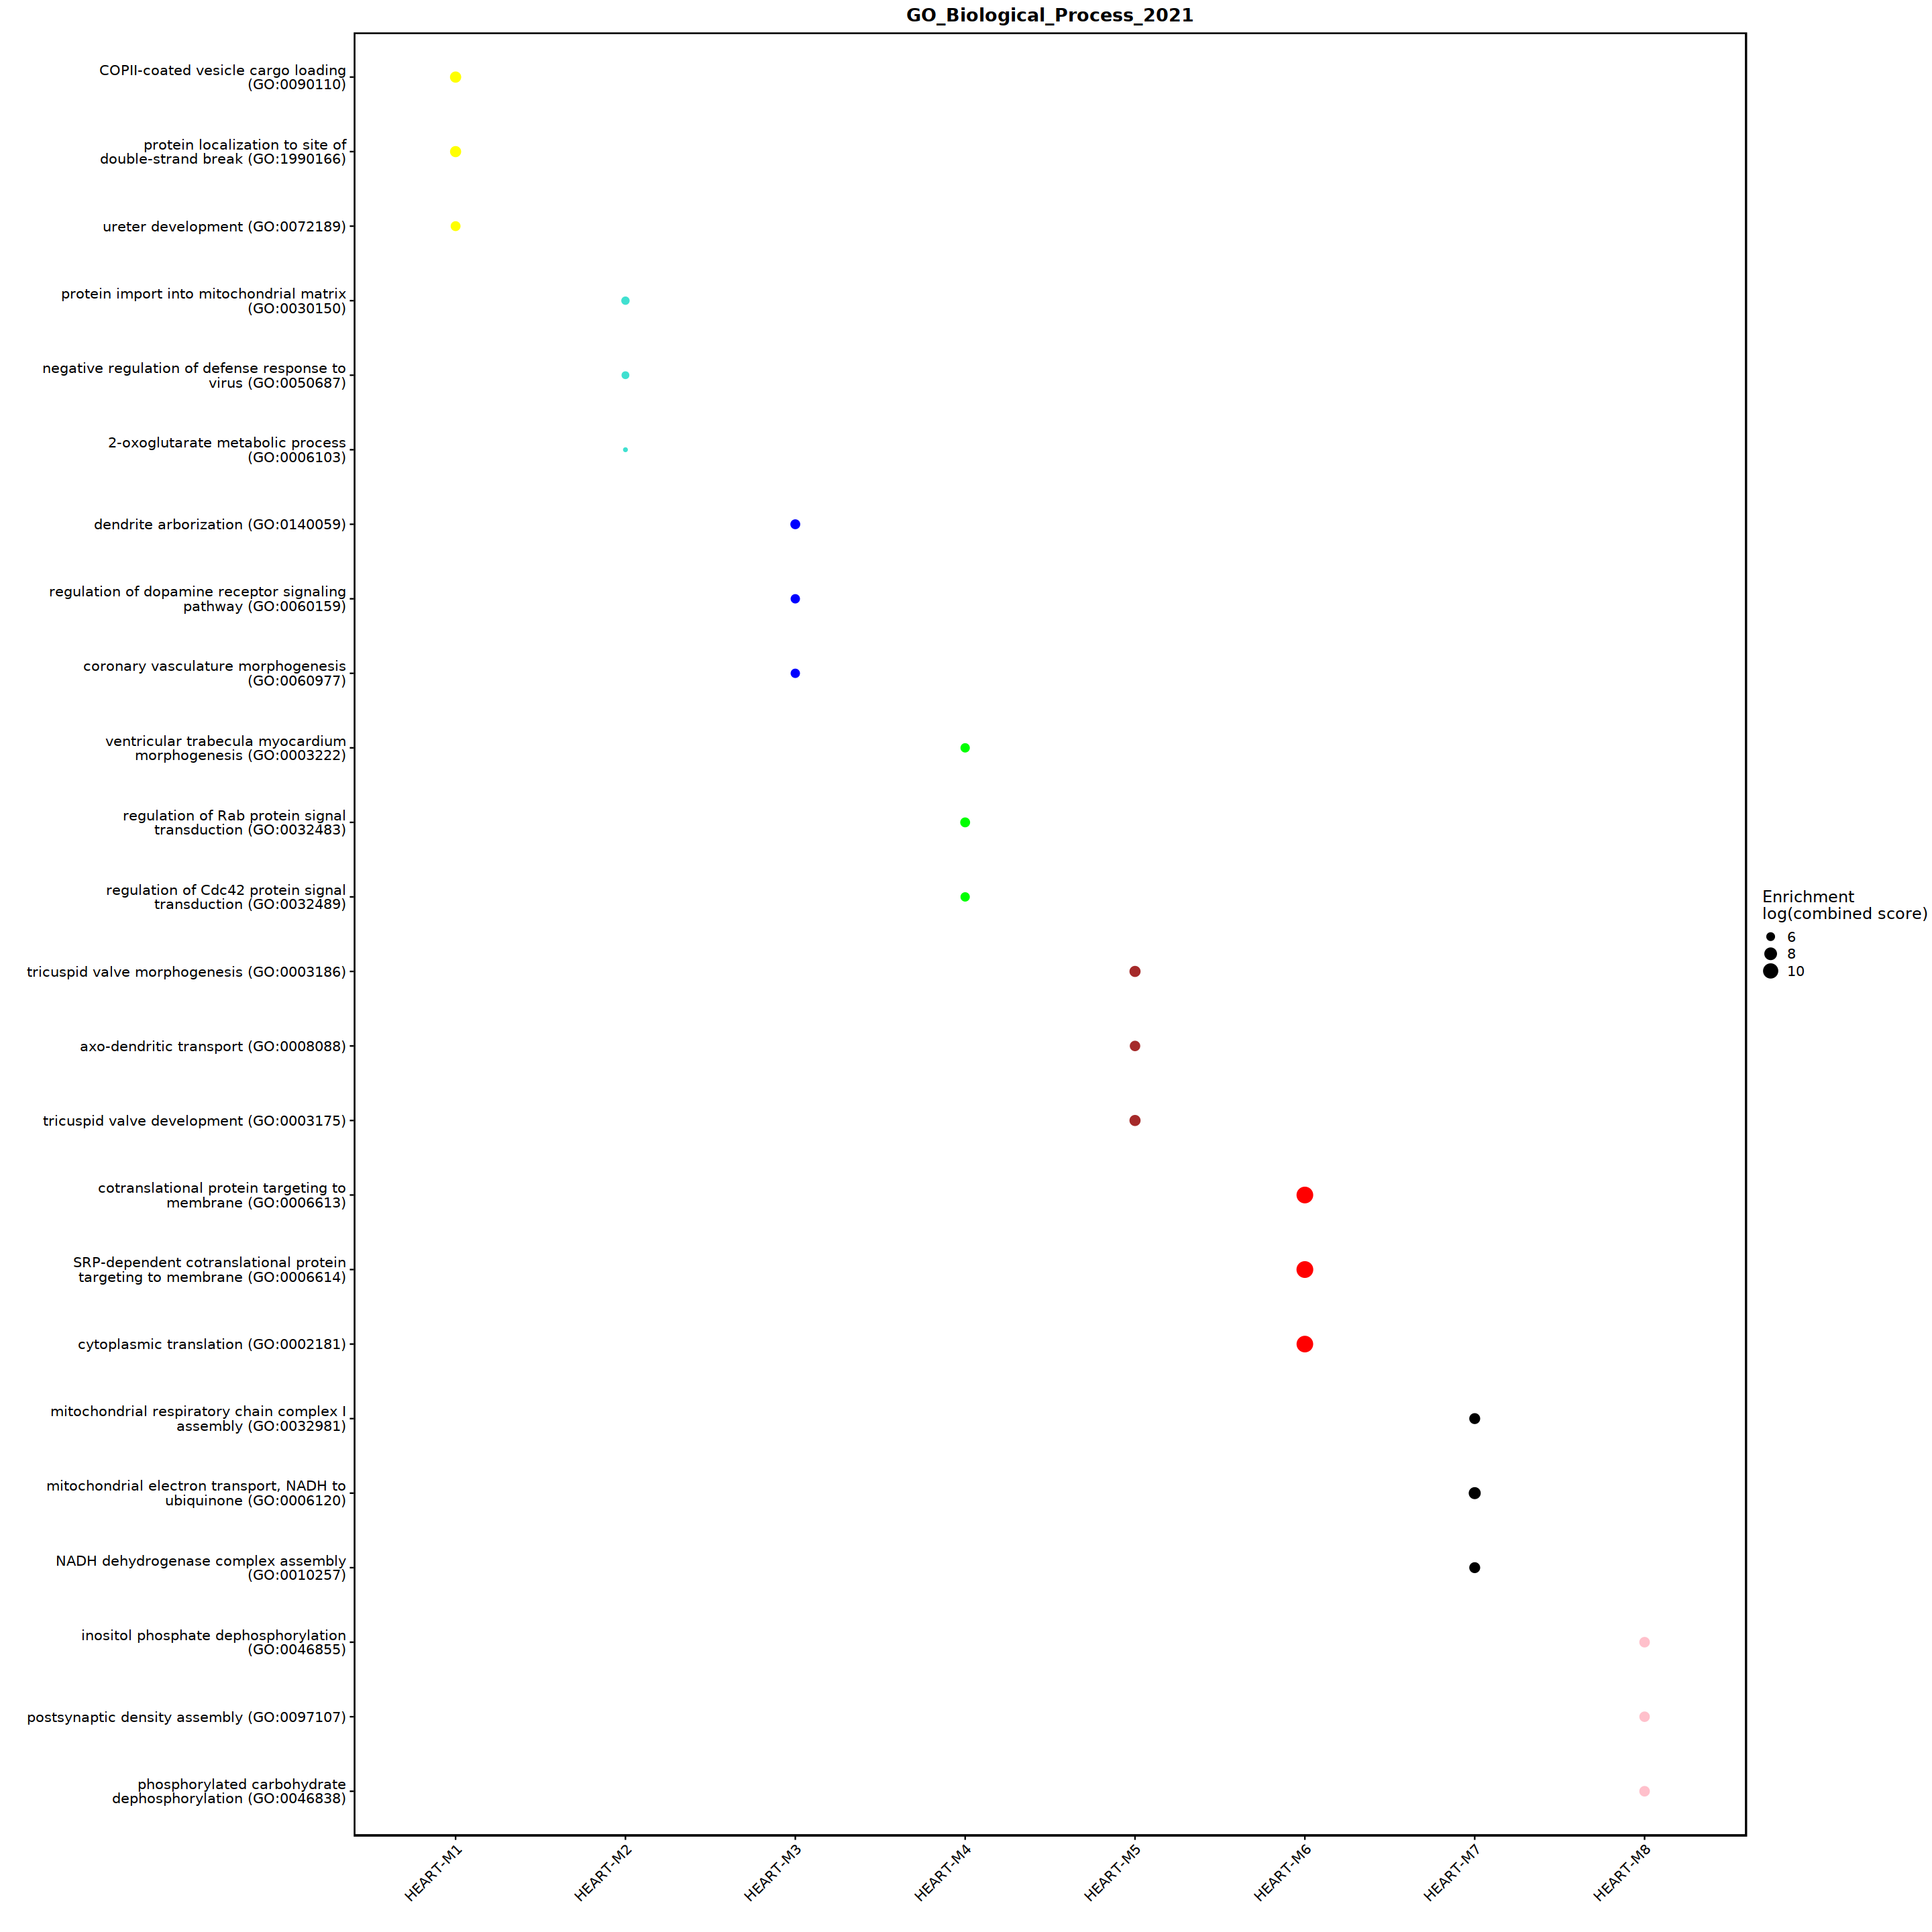

In [232]:
# enrichr dotplot
EnrichrDotPlot(
  seurat_obj,
  mods = "all", # use all modules (this is the default behavior)
  database = "GO_Biological_Process_2021", # this has to be one of the lists we used above!!!
  n_terms=3 # number of terms for each module
)

In [138]:
marker_dir <- "/cellar/users/aklie/data/igvf/topic_grn_links/mouse_adrenal/markers/"

In [149]:
lst <- list.files(marker_dir)
for (data in lst[1:length(lst)-1]) {
    celltype <- sapply(str_split(data, "_"), "[", 1)
    # Create the first data if no data exist yet
    if (!exists("dataset")){
        dataset <- read.csv(file.path(marker_dir, data), header=FALSE, sep = "\t", comment.char = "#")
        names(dataset) <- dataset[1,]
        dataset <- dataset[-1,]
        dataset$celltypes <- celltype
  }
  # if data already exist, then append it together
    if (exists("dataset")){
        temporary <- read.csv(file.path(marker_dir, data), header=FALSE, sep = "\t", comment.char = "#")
        names(temporary) <- temporary[1,]
        temporary <- temporary[-1,]
        temporary$celltypes <- celltype
        dataset <-unique(rbind(dataset, temporary))
        rm(temporary)
  }
}

In [163]:
#rownames(dataset) <- dataset$gene_name

In [151]:
?OverlapModulesDEGs

OverlapModulesDEGs           package:hdWGCNA           R Documentation

_O_v_e_r_l_a_p_M_o_d_u_l_e_s_D_E_G_s

_D_e_s_c_r_i_p_t_i_o_n:

     Performs Fisher's Exact Test for overlap between DEGs and hdWGCNA
     modules.

_U_s_a_g_e:

     OverlapModulesDEGs(
       seurat_obj,
       deg_df,
       fc_cutoff = 0.5,
       group_col = "cluster",
       wgcna_name = NULL,
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

seurat_obj: A Seurat object

  deg_df: DEG table formatted like the output from Seurat's FindMarkers

fc_cutoff: log fold change cutoff for DEGs to be included in the
          overlap test

group_col: the name of the column in deg_df containing the cell
          grouping information

wgcna_name: The name of the hdWGCNA experiment in the seurat_obj@misc
          slot

_E_x_a_m_p_l_e_s:

     OverlapModulesDEGs

In [160]:
# compute marker gene overlaps
overlap_df <- OverlapModulesDEGs(
  seurat_obj,
  deg_df = dataset,
  fc_cutoff = 1, # log fold change cutoff for overlap analysis
  group_col = "celltypes"
)

# Network analysis

In [165]:
TOM <- GetTOM(seurat_obj)

In [166]:
TOM[1:6, 1:6]

Xkr4       Mrpl15     Lypla1     Gm37988    Tcea1      Atp6v1h   
Xkr4    0.00000000 0.01627860 0.02922405 0.04391903 0.03538114 0.01415199
Mrpl15  0.01627860 0.00000000 0.03113722 0.03022769 0.02903092 0.05641388
Lypla1  0.02922405 0.03113722 0.00000000 0.02392495 0.01979698 0.03271396
Gm37988 0.04391903 0.03022769 0.02392495 0.00000000 0.01811262 0.04553366
Tcea1   0.03538114 0.02903092 0.01979698 0.01811262 0.00000000 0.04873945
Atp6v1h 0.01415199 0.05641388 0.03271396 0.04553366 0.04873945 0.00000000